# 1. Problem

  Heart attacks are one of the leading causes of death worldwide, often due to delayed recognition of warning signs or subtle, unnoticed symptoms. In this project, we aim to study and analyse patient data to predict heart attack risks early, providing individuals and healthcare providers with the opportunity to take preventive action.

 Early detection is crucial, it saves lives, reduces complications, and alleviates the burden on healthcare systems. By predicting the likelihood of a heart attack, this project seeks to empower individuals to take preventive measures and protect their health.


# 2. Data Mining Task

   In our project, we will employ two data mining tasks to help predict the likelihood of heart attacks: classification and clustering. For classification, we will train a model to determine whether an individual is at risk of experiencing a heart attack or not, based on a set of medical and lifestyle attributes such as age, cholesterol levels, blood pressure, heart rate, Diabetes, etc. Classification will be based on the "heart attack risk level" class, which could be binary (at risk or not).

   As for clustering, our model will group individuals with similar characteristics into clusters without considering the heart attack risk class. These clusters will help identify patterns and shared traits among individuals, offering deeper insights into risk factors and potential relationships between attributes. This approach may also uncover new insights to improve the understanding of heart attack risks and support targeted preventive strategies.


# 3. Data

The Source:  https://www.kaggle.com/datasets/m1relly/heart-attack-prediction/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
df=pd.read_csv('Dataset/heart.attack.csv')

In [ ]:
num_objects= len(df)
attributes_info = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.values
})

print(f"Number of attributes: {len(df.columns)}")
print('\n')
print("Attributes and their types:")
print(attributes_info)
print('\n')
print(f"Number of objects: {num_objects}")

Number of attributes: 13


Attributes and their types:
       Attribute Name Data Type
0          Patient ID    object
1                 Age     int64
2                 Sex    object
3         Cholesterol     int64
4         Systolic BP     int64
5        Diastolic BP     int64
6          Heart Rate     int64
7            Diabetes     int64
8      Family History     int64
9             Smoking     int64
10               Diet    object
11          Continent    object
12  Heart Attack Risk     int64


Number of objects: 4000


As we can see, there are 4,000 objects, a total of 12 columns. Regarding data types, there are 7 integer attributes and 5 object attributes.

General information about the dataset:

- Number of attributes: 12

- Number of objects: 4000

- Class label: Heart Attack Risk

# Attributes’ description table:

In [ ]:
data = {
    "Attribute Name": [
        "Patient ID", "Age", "Sex", "Cholesterol", "Systolic BP","Diastolic BP", "Heart Rate", "Diabetes",
        "Family History", "Smoking", "Diet", "Continent", "Heart Attack Risk"
    ],
    "Description": [
        "Unique id of the patient", "Patient's age", "Gender of the patient", "Exam result of cholesterol",
        "Result of systolic blood pressure which measures the pressure in arteries when the heart contracts. ",
        "Result of diastolic blood pressure which measures the pressure in arteries between heartbeats when the heart is resting.",
        "Number of heartbeats per minute, indicating cardiovascular health.",
        "Indicates whether the patient has diabetes. Diabetes is a chronic health condition where the body is unable to properly regulate blood sugar levels",
        "Indicates if the patient has a family history of heart attacks.",
        "Indicates whether the patient smokes.",
        "Indicates the dietary habits of the patient, categorizing them into three types based on their nutrition and eating patterns: (Average) signifies a typical diet, (Healthy) indicates a focus on nutritious foods, and (Unhealthy) reflects poor dietary choices",
        "Specifies the continent where the patient resides, providing geographical context for the individual's background.",
        " The class label, indicates whether the patient has a heart attack risk"
    ],
    "Data Type": [
        "Nominal", "Numeric", "Binary", "Numeric","Numeric", "Numeric", "Numeric", "Binary",
        "Binary", "Binary", "Nominal", "Nominal", "Binary"
    ],
    "Possible Values": [
        "", "Range between 18-90", "Female, Male", "Range between 120-400", "Range between 90-180", "Range between 60-110","Range between 40-110", "0:No Diabetes, 1:Diabetes",
        "0:No family history ,1:family history", "0:Non-somker, 1:Smoker", '"Average", "Healthy", "Unhealthy"',
        '"Europe", "Africa", "Australia", "Asia", "South America", "North America"', "0: No heart attack ,1:Heart attack risk"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

# Sample of 20 people from the dataset:

In [ ]:
sample=df.sample(n=20);
sample

Patient ID   Age     Sex   Cholesterol  Systolic BP  Diastolic BP  \
1111    TOZ6210    28    Male           218          161            82   
491     VHY7394    25    Male           291          141           102   
3194    TLP5698    21    Male           347          149            89   
1142    FXW1323    25    Male           236          180            60   
3809    FIG9248    84    Male           292          156           101   
1524    VGI2198    47    Male           240          149            88   
2363    OZW2958    62    Male           221          116            67   
1162    PSB9385    24    Male           152          171            75   
629     SVZ9785    21  Female           235          136            64   
1122    FTK5777    42    Male           193          154            73   
412     UTO3905    59    Male           269          108           104   
1422    OQL5209    30    Male           202          116            87   
1676    UJA9461    79    Male           293          103            86   
959     ZZF6668    42    Male           160          164           104   
3338    XOD0410    63    Male           367          177            64   
809     GTF4591    64    Male           162          116            89   
2852    XES1074    36    Male           366          139            74   
1997    VQI1338    33  Female           270          148            86   
203     ZZQ4895    49    Male           279          177            70   
2608    BDX5751    78  Female           197           92            68   

       Heart Rate  Diabetes  Family History  Smoking       Diet  \
1111           42         1               0        1  Unhealthy   
491            75         1               0        1    Average   
3194           40         1               1        1  Unhealthy   
1142           67         1               1        1    Healthy   
3809           91         1               0        1  Unhealthy   
1524           88         0               1        1    Average   
2363           93         1               0        1    Healthy   
1162           45         1               1        1    Average   
629            58         1               1        0    Healthy   
1122           51         1               0        1  Unhealthy   
412            84         1               0        1    Healthy   
1422           81         1               1        1    Healthy   
1676          105         0               0        1    Healthy   
959            89         0               1        1    Healthy   
3338           55         0               1        1  Unhealthy   
809           103         0               1        1  Unhealthy   
2852          100         1               1        1    Healthy   
1997           84         1               0        0  Unhealthy   
203            86         1               0        1    Average   
2608           78         1               0        1  Unhealthy   

          Continent  Heart Attack Risk  
1111         Europe                  1  
491            Asia                  1  
3194         Europe                  1  
1142           Asia                  1  
3809           Asia                  1  
1524  North America                  1  
2363           Asia                  0  
1162      Australia                  0  
629            Asia                  0  
1122  South America                  1  
412            Asia                  0  
1422         Europe                  0  
1676  South America                  0  
959   South America                  1  
3338           Asia                  1  
809   South America                  0  
2852           Asia                  1  
1997           Asia                  0  
203            Asia                  0  
2608           Asia                  0

# Missing values

In [ ]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
Patient ID           0
 Age                 0
Sex                  0
 Cholesterol         0
Systolic BP          0
Diastolic BP         0
 Heart Rate          0
Diabetes             0
Family History       0
Smoking              0
Diet                 0
Continent            0
Heart Attack Risk    0
dtype: int64

Rows with missing values:
0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Length: 4000, dtype: int64


We notice that there are no missing values, and all columns are complete.



# Understanding the data through graph representations:

Understanding the data through graph representations:
The "heart attack risk" class name was primarily utilized to comprehend the relationship between heart attack and all attributes, specifically how they are associated with the probability of having a heart attack. It indicates which individuals are affected and whether they are not by linking to every attribute in the data. It also helps determine the gender differences in heart attack risk and the relationship between age and heart attack risk. This makes it easier to understand the factors influencing this condition and to find signs that could aid in an early diagnosis.


Sex
Male      0.69675
Female    0.30325
Name: proportion, dtype: float64


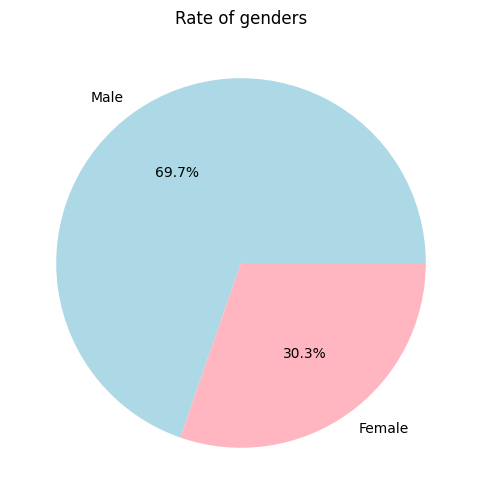

In [ ]:
data2 = df ['Sex'].value_counts(normalize=True)
print(data2)
name = df['Sex'].value_counts().index.tolist()
value = df['Sex'].value_counts().tolist()
fig = plt.figure(figsize=(6,6))
plt.pie(value, labels=name,autopct='%1.1f%%',colors=['#ADD8E6','#FFB6C1'])
plt.title('Rate of genders')
plt.show()

We used a pie chart to illustrate the percentage distribution of each gender in the total data set , this results in 69.7% of men and 30.4% of female.

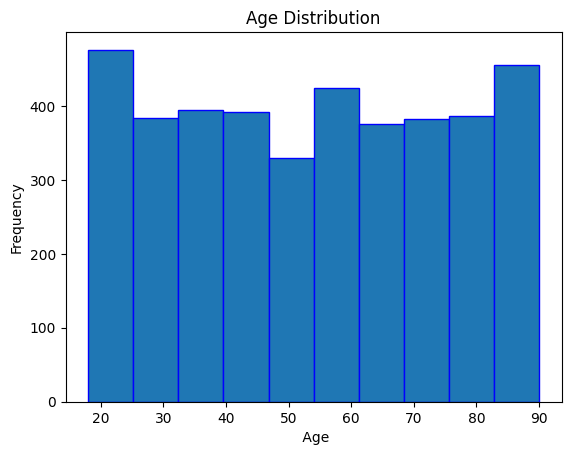

In [ ]:
ages = df[' Age']
plt.hist(ages , bins = 10, edgecolor = 'blue')
plt.title('Age Distribution')
plt.xlabel(' Age')
plt.ylabel('Frequency')

plt.show;

The histogram illustrates the age distribution of the study participants, indicating that individuals in their twenties are the most likely to participate.

 Heart Rate
72     0.01875
81     0.01850
57     0.01775
94     0.01775
97     0.01700
        ...   
80     0.01175
106    0.01125
103    0.01125
73     0.01050
96     0.01025
Name: proportion, Length: 71, dtype: float64


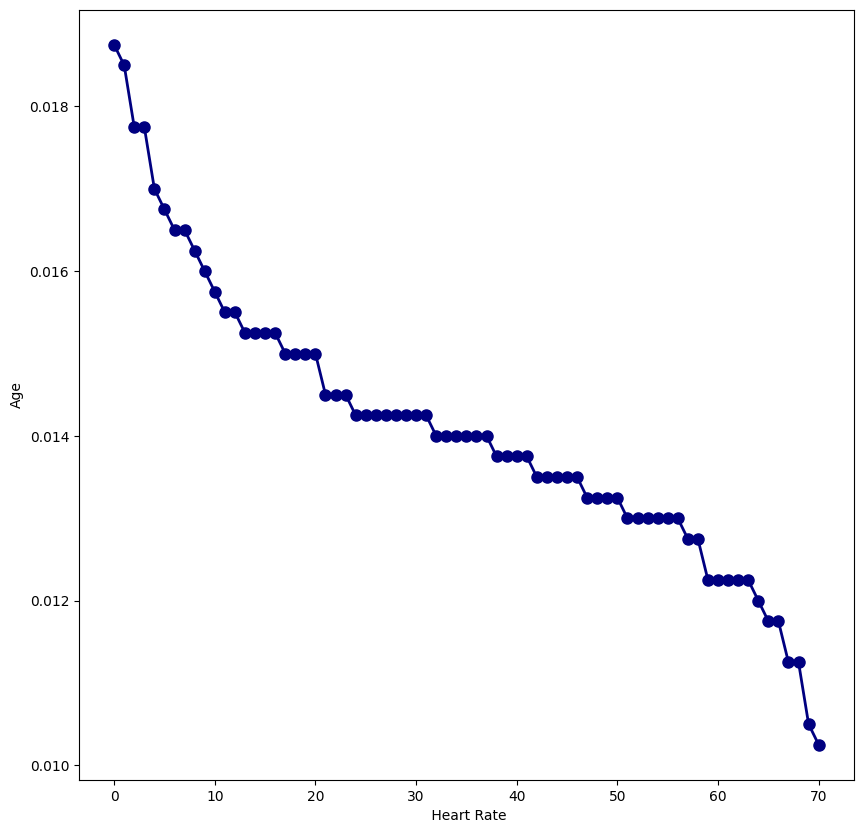

In [ ]:
data3 = df[' Heart Rate'].value_counts(normalize=True)
print(data3)
x = range(len(data3))
y= data3.values
plt.figure(figsize=(10,10))
plt.plot(x,y, color='#000080', marker='o', linestyle='-', linewidth=2, markersize=8, label='Pink Line')
plt.xlabel(' Heart Rate')
plt.ylabel('Age')
plt.show()

The chart scatter plot shows that the relationship between age and heart rate is an inverse relationship, where the older a person gets, the lower the heart rate.

Heart Attack Risk
0    53.7
1    46.3
Name: proportion, dtype: float64


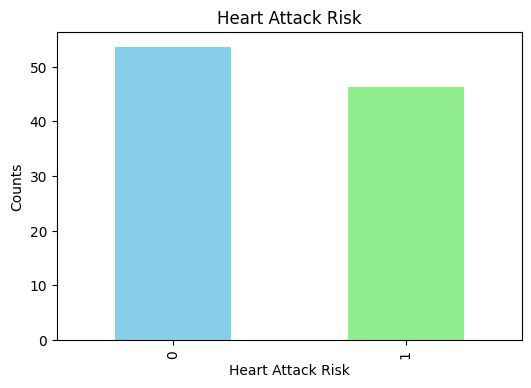

In [ ]:
data4=df['Heart Attack Risk'].value_counts(normalize=True)*100
print(data4)
plt.figure(figsize=(6, 4))
data4.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Counts')
plt.show()

The bar chart illustrates the numerical differences between class label, while the classification results reveal a balance in heart attack risk between individuals at risk and those not at risk.

Heart Attack Risk     0     1
Diabetes Smoking             
0        0           84    70
         1          659   569
1        0          124   143
         1         1281  1070


Text(0, 0.5, 'Number of Patients')

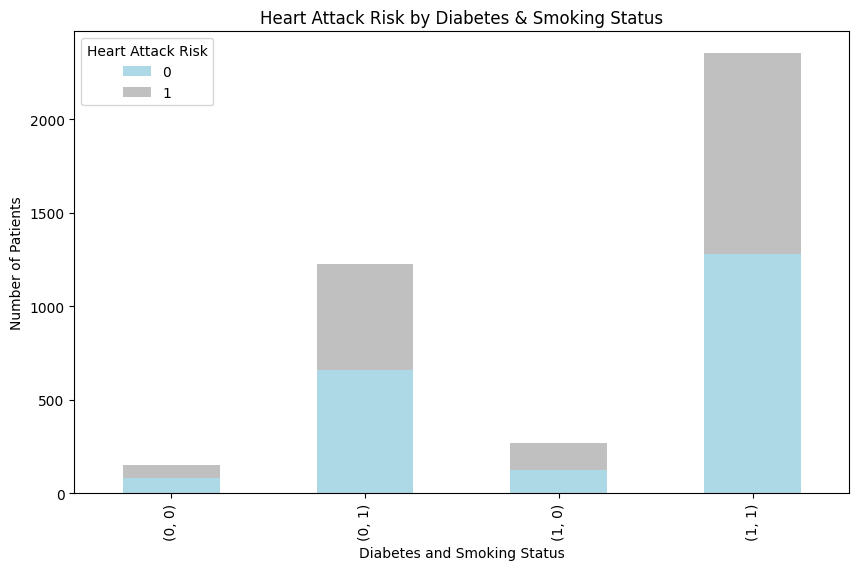

In [ ]:

crosstab_data = pd.crosstab([df['Diabetes'], df['Smoking']], df['Heart Attack Risk'])
print(crosstab_data)
ax = crosstab_data.plot(kind='bar', stacked=True, color= ['lightBlue', 'silver'], figsize=(10, 6))

plt.title('Heart Attack Risk by Diabetes & Smoking Status')
plt.xlabel('Diabetes and Smoking Status')
plt.ylabel('Number of Patients')

In this stacked bar chart, we are visualizing the impact of the two variables, (Diabetes and Smoking), on heart attack risk. The graph illustrates:

1. No Diabetes, No Smoking: Very few patients are at risk of a heart attack, with both risk categories (0 and 1) being almost equally small.

2. No Diabetes, Smoking: A larger number of patients, with a noticeable portion at risk (1). Smoking clearly increases the heart attack risk here.

3. Diabetes, No Smoking: Similar to the "No Diabetes, No Smoking" category, there are fewer patients overall, with a small proportion at risk.

4. Diabetes, Smoking: This category has the highest number of patients, with a significant portion at risk for a heart attack.

This concludes that Smoking seems to play a major role in increasing heart attack risk, regardless of diabetes status. Diabetes alone shows a smaller effect on heart attack risk compared to smoking, but when combined with smoking, the risk becomes much more pronounced.

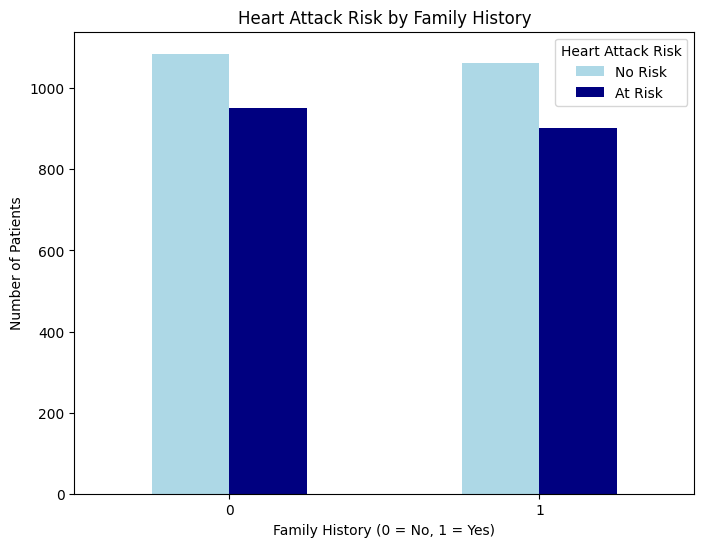

In [ ]:
family_history_counts = df.groupby(['Family History', 'Heart Attack Risk']).size().unstack()

family_history_counts.plot(kind='bar', figsize=(8, 6), color=['lightBlue', 'navy'])
plt.title('Heart Attack Risk by Family History')
plt.xlabel('Family History (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack Risk', labels=['No Risk', 'At Risk'])
plt.xticks(rotation=0)
plt.show()

This is a grouped bar chart that compares the number of patients with and without a family history of heart disease across two different values of heart attack risk(0-1). As shown by the graph , there is no impact on heart attack risk from family history as the 2 bars with family history and without are almost equal to eachother.

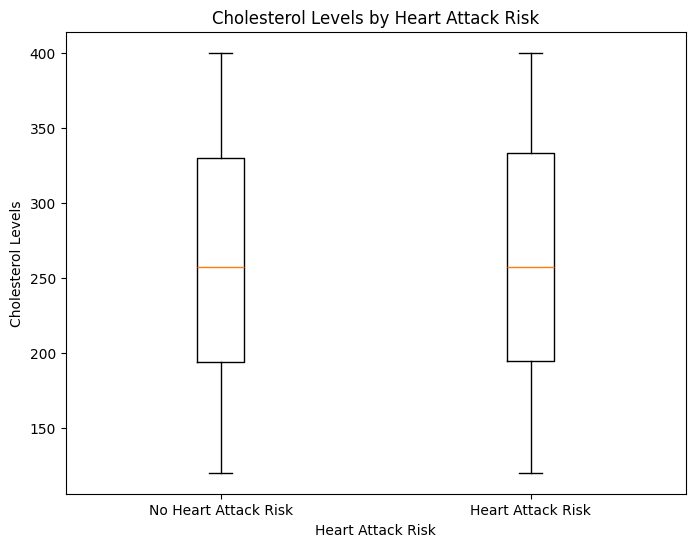

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Heart Attack Risk'] == 0][' Cholesterol'],
             df[df['Heart Attack Risk'] == 1][' Cholesterol']])

plt.xticks([1, 2], ['No Heart Attack Risk', 'Heart Attack Risk'])  # ضبط تسميات المحور X
plt.title('Cholesterol Levels by Heart Attack Risk')
plt.ylabel('Cholesterol Levels')
plt.xlabel('Heart Attack Risk')
plt.show()


This ia a BoxPlot that compares the distribution of cholesterol levels between patients with and without a heart attack risk, allowing you to see the spread, median, and potential outliers in each group Median:



Both groups have a similar median cholesterol level, indicating that the central tendency of cholesterol is approximately the same for patients with and without heart attack risk.


- IQR:

The spread of cholesterol levels (IQR) appears to be similar for both groups, showing that cholesterol variability is comparable in both populations.

- Whiskers:

The whiskers extend to the minimum and maximum values (within 1.5 times the IQR), and both groups exhibit similar ranges in cholesterol levels.

- Potential Outliers:

There are no visible outliers in this plot, as all the data points lie within the whiskers.

This suggests that other factors in the dataset could have a stronger influence on heart attack risk than cholesterol alone.

# Summary for data:

In [ ]:
summary=df.describe();
print(summary);

               Age   Cholesterol  Systolic BP  Diastolic BP   Heart Rate  \
count  4000.000000   4000.000000  4000.000000   4000.000000  4000.000000   
mean     53.759000    260.714500   134.875250     85.229500    74.925750   
std      21.503942     80.671345    26.434218     14.738322    20.368148   
min      18.000000    120.000000    90.000000     60.000000    40.000000   
25%      35.000000    194.000000   111.000000     73.000000    57.000000   
50%      54.000000    257.000000   135.000000     85.000000    75.000000   
75%      73.000000    331.000000   158.000000     98.000000    93.000000   
max      90.000000    400.000000   180.000000    110.000000   110.000000   

         Diabetes  Family History      Smoking  Heart Attack Risk  
count  4000.00000     4000.000000  4000.000000        4000.000000  
mean      0.65450        0.491000     0.894750           0.463000  
std       0.47559        0.499981     0.306914           0.498691  
min       0.00000        0.000000     0.000

# Show the Min, 1st Q, Median, Mean ,3rd Q ,Max for each numeric column:

using the summary_stats() function, we observed several points from these summary statistics, such as:


- Age: There is significant variability in ages, ranging from 18 to 90 years, with an average of 53.75 years. This indicates that the risk of a heart attack is spread across individuals within a wide age range.

- Cholesterol: The values vary significantly, with a maximum of 400 and a minimum of 120. The mean is 260.71 which is slightly higher than the median 257 (slight skwe in distribution), and a standard deviation of 80.67, which indicates considerable variability in cholesterol levels

- Heart Rate: Heart Rate values range from 40 bpm to 110 bpm which indiactes a wide range, with a mean of 74.9 bpm, which is within the normal heart rate range, and a median of 75 that is very close to the mean, suggesting that the heart rate distribution is relatively symmetrical , and with a standard deviation of 20.36 which indicates variability in heart rates among individuals.

- Diabetes: The values are binary, limited to 0 and 1, with a mean of 0.65, indicating that a significant portion of the population may have diabetes.

- Family History: The values are binary, limited to 0 and 1, with a mean of 0.491 indicating that nearly half of the observations report a family history of heart attack risk, and a standard deviation of 0.499981 which indicates that there is roughly equal proportions of individuals with and without family history.

- Smoking: The values are binary, limited to 0 and 1, with a mean of 0.894, The mean indicates a high prevalence of smoking within the dataset,the median being 1 confirms that at least half of the individuals in the dataset are smokers, indicating a skewed distribution towards smoking behavior, standard deviation being 0.3069 suggests variability in smoking status, but since the mean is close to 1, it indicates that most individuals in the dataset are smokers. The presence of non-smokers (0) is less common.


- Systolic BP: The values vary, with a maximum of 180 and a minimum of 90, with the mean being 134.875 which is very close to the median 135, suggesting that the distribution is likely symmetrical which indicates a balanced spread of values around the center (no significant outliers),the standard deviation being 26.434 is relatively large compared to the mean, indicating considerable variability in systolic BP observations (wide range of blood pressure levels).


- Diastolic BP: Diastolic BP values range from 60 to 110, with a mean of 85.23 that is slightly higher than the median 85, the standard deviation being 14.74 makes it significantly a portion of the mean,indicating some variability in the diastolic BP observations.


- Heart Attack Risk: The values are binary, limited to 0 and 1, with a mean of 0.463 and a standard deviation of 0.498691 which suggests considerable variability in heart attack risk among the observations, with many individuals falling towards both ends of the risk spectrum.

# Calculate the variance :

In [ ]:
variance= df.var(numeric_only=True);
print(variance)

 Age                  462.419524
 Cholesterol         6507.865956
Systolic BP           698.767879
Diastolic BP          217.218134
 Heart Rate           414.861452
Diabetes                0.226186
Family History          0.249981
Smoking                 0.094196
Heart Attack Risk       0.248693
dtype: float64


Variance helps us understand the extent of dispersion or scatter of values in each column. As variance increases, it indicates that the values are more spread out from the mean; conversely, decreasing variance suggests that the values are more closely clustered around the mean. Therefore, our variance results indicate the following:

- Age, Systolic BP, Diastolic BP, Heart Rate: These columns exhibit high variance, indicating a significant level of dispersion and spread of values.

- Cholesterol: This column shows very high variance, reflecting an even greater level of dispersion.

- Diabetes, Family History, Smoking, and Heart Attack Risk: These columns have moderate to low variance, suggesting a moderate to low degree of dispersion and value spread."


# 4. Data Preprocessing:
# Show outliers:


In [ ]:
# Detecting outliers with IQR
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)


selected_columns = [' Age', ' Cholesterol','Systolic BP','Diastolic BP', ' Heart Rate']
outlier_counts = {column: 0 for column in selected_columns}

for column in selected_columns:
    outliers = count_outliers(df[column])
    outlier_counts[column] = outliers

total_rows_with_outliers = sum(outlier_counts.values())

print("Outlier Counts:")
for column in selected_columns:
    count = outlier_counts[column]
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
 Age: 0 rows with outliers
 Cholesterol: 0 rows with outliers
Systolic BP: 0 rows with outliers
Diastolic BP: 0 rows with outliers
 Heart Rate: 0 rows with outliers
Total Rows with Outliers: 0


Outliers are identified using the IQR method with an outlier threshold of 1.5.

The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1).

An upper bound is defined as Q3+(1.5 x IQR)

A lower bound is defined as Q1-(1.5 × IQR)

Data points falling outside these bounds are considered outliers

The output indicates there are no Outliers in all numeric columns.

# Show duplicates:

In [ ]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


This indicates that there are no duplicate rows in the dataset.




# Correlation Coefficient:


Correlation coefficient between  Age and  Cholesterol: -0.009094960238451839
Correlation coefficient between  Age and Systolic BP: 0.0002062039547510348
Correlation coefficient between  Age and Diastolic BP: -0.02546431905829374
Correlation coefficient between  Age and  Heart Rate: -0.005995611641085187
Correlation coefficient between  Cholesterol and Systolic BP: 0.00487529254971903
Correlation coefficient between  Cholesterol and Diastolic BP: 0.011497810577428526
Correlation coefficient between  Cholesterol and  Heart Rate: 0.0013856946952423806
Correlation coefficient between Systolic BP and Diastolic BP: 0.02938362204384109
Correlation coefficient between Systolic BP and  Heart Rate: -0.0027745943346274278
Correlation coefficient between Diastolic BP and  Heart Rate: -0.027208395895349412


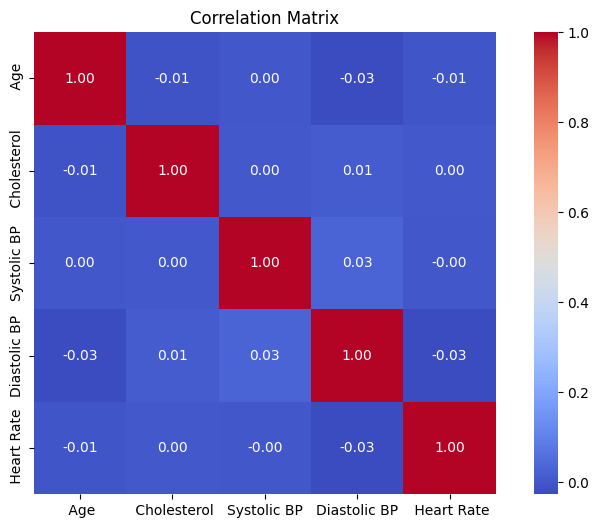

In [ ]:
df = df.dropna()

columns = [' Age',' Cholesterol','Systolic BP','Diastolic BP',' Heart Rate' ]

correlation_results = {}

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        data_col1 = df[col1]
        data_col2 = df[col2]

        correlation_coefficient = np.corrcoef(data_col1, data_col2)[0, 1]
        correlation_results[(col1, col2)] = correlation_coefficient
        print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient}")
plt.figure(figsize=(10, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The aim of this analysis is to investigate the relationships between various numerical variables associated with health data, including Heart Rate, Systolic Blood Pressure (BP), Diastolic BP, Age, and Cholesterol. To determine how closely related two variables are, the correlation coefficient is determined. The correlation coefficient's value (range from -1 to 1) indicates the relationship's strength and direction:

• A value close to 1 suggests a significant positive association (as one variable increases, so does the other).

• A value close to -1 implies a significant negative association (one variable increases while the other falls).

• A number approaching 0 suggests there is no linear relationship between variables.

1. Age and Cholesterol: ,Correlation coefficient: -0.009 Close to 0, showing no significant linear association between age and cholesterol levels.

2. Age and Systolic Blood Pressure: ,Correlation coefficient: 0.0002 ,This value is extremely near to zero, indicating no correlation in this dataset.

3. Age and Diastolic Blood Pressure ,Correlation coefficient: -0.025 ,Weak negative value indicates no significant association between the two variables.

4. Age and Heart Rate ,Correlation coefficient: -0.006 ,Correlation is nearly zero, showing no significant association between the two.

5. Cholesterol and Systolic Blood Pressure ,Correlation coefficient: 0.0049 ,Value close to zero indicates no significant relationship.

6. Cholesterol and Diastolic Blood Pressure ,Correlation coefficient: 0.0115 ,This little positive number indicates a weak and inconsequential association between the two.

7. Cholesterol and Heart Rate ,correlation coefficient: 0.0014 ,Nearly zero, indicating no meaningful link.

8. Systolic and diastolic blood pressure ,Correlation coefficient: 0.029 ,A modest positive number indicates a poor association between the two.

9. Systolic blood pressure and heart rate ,Correlation coefficient: -0.0028 ,Close to 0, showing no meaningful association between the two variables.

10. Measure diastolic blood pressure and heart rate, Correlation coefficient : -0.027 ,A weak negative association between diastolic blood pressure and heart rate.

There are no significant or strong linear correlations between any of the health metrics in this dataset, since all correlation coefficients are extremely close to 0.



# Chi squared:


In [ ]:
categorical_columns = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Diet', 'Continent']

for column in categorical_columns:
    print(f"\nChi-Square Test for {column} and Heart Attack Risk:")

    contingency_table = pd.crosstab(df[column], df['Heart Attack Risk'])
    print("Contingency Table:")
    print(contingency_table)

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


Chi-Square Test for Sex and Heart Attack Risk:
Contingency Table:
Heart Attack Risk     0     1
Sex                          
Female              639   574
Male               1509  1278
Chi-Square Statistic: 0.6717581386257074
P-Value: 0.4124393106850527
Degrees of Freedom: 1
Expected Frequencies:
[[ 651.381  561.619]
 [1496.619 1290.381]]

Chi-Square Test for Diabetes and Heart Attack Risk:
Contingency Table:
Heart Attack Risk     0     1
Diabetes                     
0                   743   639
1                  1405  1213
Chi-Square Statistic: 0.0005956473310359398
P-Value: 0.9805288524025058
Degrees of Freedom: 1
Expected Frequencies:
[[ 742.134  639.866]
 [1405.866 1212.134]]

Chi-Square Test for Family History and Heart Attack Risk:
Contingency Table:
Heart Attack Risk     0    1
Family History              
0                  1085  951
1                  1063  901
Chi-Square Statistic: 0.24679185087103006
P-Value: 0.6193431480858171
Degrees of Freedom: 1
Expected Frequencies

To investigate the association between a number of categorical factors (including sex, diabetes, family history, smoking, diet, and continent) and the chance of having a heart attack, we are using a chi-square test in this investigation. Finding out if these factors are statistically related to the likelihood of a heart attack risk. The crucial point to remember is that a strong correlation is present when the p-value obtained from the chi-square test is less than 0.05, indicating that the link between the variable and the chance of having a heart attack is deemed statistically significant. However, the link is weak or not statistically significant if the p-value is higher than 0.05.

1. Sex has a slight connection with heart attack risk, as indicated by the chi-square statistic (p-value > 0.05). This shows that there is no clear link between sex and heart attack risk.

2. Diabetes: Similar to sex, the chi-square test shows a weak correlation with a p-value larger than 0.05, suggesting that diabetes does not significantly increase the risk of a heart attack.

3. Family History: Although a bit stronger than sex and diabetes, the p-value remains above 0.05, indicating no statistical significance.

4. Smoking had a higher chi-square value, indicating a greater link with heart attack risk. However, the p-value is more than 0.05 but near to 0.05 (0.069), indicating that smoking has a notable, although not statistically significant, association with heart attack risk. If the p-value had been a little smaller, smoking would have been an important influence.

5. Diet: The chi-square test indicates a weak connection (p-value larger than 0.05) between diet categories (average, healthy, unhealthy) and heart attack risk.

6. Continent: Although there is considerable difference in heart attack risk among continents, the p-value is likely more than 0.05, indicating that the connection is not statistically significant.

In [ ]:
binary_columns = ['Diabetes', 'Family History', 'Smoking','Diet','Continent','Sex']

results = {}

for i in range(len(binary_columns)):
    for j in range(i + 1, len(binary_columns)):
        col1 = binary_columns[i]
        col2 = binary_columns[j]

        contingency_table = pd.crosstab(df[col1], df[col2])

        print(f"\nContingency Table for {col1} and {col2}:")
        print(contingency_table)

        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        results[(col1, col2)] = {
            'Chi-Square Statistic': chi2_stat,
            'P-Value': p_value,
            'Degrees of Freedom': dof,
            'Expected Frequencies': expected
        }

        print(f"\nChi-Square Statistic for {col1} and {col2}: {chi2_stat}")
        print(f"P-Value for {col1} and {col2}: {p_value}")
        print(f"Degrees of Freedom for {col1} and {col2}: {dof}")
        print("Expected Frequencies:")
        print(expected)


Contingency Table for Diabetes and Family History:
Family History     0     1
Diabetes                  
0                683   699
1               1353  1265

Chi-Square Statistic for Diabetes and Family History: 1.7585155578575806
P-Value for Diabetes and Family History: 0.18480977946239308
Degrees of Freedom for Diabetes and Family History: 1
Expected Frequencies:
[[ 703.438  678.562]
 [1332.562 1285.438]]

Contingency Table for Diabetes and Smoking:
Smoking     0     1
Diabetes           
0         154  1228
1         267  2351

Chi-Square Statistic for Diabetes and Smoking: 0.759725330150571
P-Value for Diabetes and Smoking: 0.3834144935383894
Degrees of Freedom for Diabetes and Smoking: 1
Expected Frequencies:
[[ 145.4555 1236.5445]
 [ 275.5445 2342.4555]]

Contingency Table for Diabetes and Diet:
Diet      Average  Healthy  Unhealthy
Diabetes                             
0             461      475        446
1             864      891        863

Chi-Square Statistic for Diabet

In this analysis, we will use a Chi-Square test to see if there is a statistically significant link between numerous binary variables (Diabetes, Family History, Smoking, Diet, Continent, and Sex). The purpose is to determine if the variables are related in a meaningful way. The main idea is that if the p-value is less than 0.05, the relationship between the variables is statistically significant, indicating a strong association. A p-value larger than 0.05 indicates that the association is weak or not statistically significant.

1. Diabetes and Family History: There is no statistically significant correlation between Diabetes and Family History, as indicated by the p-value of 0.1848, which is bigger than 0.05.

2. Diabetes and Smoking: There is no significant correlation between Diabetes and Smoking, as indicated by the p-value of 0.3834, which is also bigger than 0.05.

3. Diet and Diabetes: The p-value of 0.9063 indicates that there is no statistically significant correlation between diet and diabetes.

4. Diabetes and Continent: There is no significant correlation between Diabetes and Continent, as indicated by the p-value of 0.2356, 4.

5. Diabetes and Sex: There is no statistically significant correlation between Diabetes and Sex, according to the p-value of 0.2973.

6. Family History and Smoking: The p-value is 0.0948, slightly higher than 0.05, suggesting that the association is not statistically significant but near to it.

7. No significant relationship found between Family History and Diet (p-value = 0.2080).

8. Family History and Continent: The p-value of 0.1403 indicates no significant relationship between Family History and Continent.

9. Family History and Sex: The p-value of 0.4058 indicates no statistically significant link between the two variables.

10. Smoking and Diet: The p-value of 0.8346 indicates a weak correlation between smoking and diet.

11. Smoking and Continent: The p-value is 0.8387, showing no statistically significant relationship between smoking and continent.

12. Smoking and Sex: The p-value is 2.7e-236, significantly lower than 0.05, showing a strong and statistically significant link between smoking and sex.

13. Diet and Continent: The p-value is 0.5436 indicates no statistically significant relationship between diet and continent.

14. There is no statistically significant association between diet and sex (p-value = 0.6869).

15. There is no statistically significant correlation between continent and sex (p-value = 0.9535).

# Remove attributes with an absolute correlation

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_threshold = 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
numeric_attributes = list(df.select_dtypes(include='number').columns)

attributes_to_remove = set()

for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j)

df_filtered = df.drop(columns=attributes_to_remove)

print("\nOriginal DataFrame:")
print(df)

print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)


Original DataFrame:
     Patient ID   Age     Sex   Cholesterol  Systolic BP  Diastolic BP  \
0       BMW7812    67    Male           208          158            88   
1       CZE1114    21    Male           389          165            93   
2       BNI9906    21  Female           324          174            99   
3       JLN3497    84    Male           383          163           100   
4       GFO8847    66    Male           318           91            88   
...         ...   ...     ...           ...          ...           ...   
3995    UII9280    66    Male           201          172            91   
3996    SZU8764    42  Female           129          109            63   
3997    CQJ6551    81    Male           127          153           110   
3998    DZQ4343    81    Male           244          109           103   
3999    WER4678    44  Female           150          100            97   

       Heart Rate  Diabetes  Family History  Smoking       Diet  \
0              72      

The purpose of this analysis is to identify and remove attributes that show high correlation in a health dataset. This helps to avoid redundancy and enhance model efficiency. Highly correlated features can lead to Complexity, which might negatively affect the performance of statistical models. In this analysis, we computed the correlation matrix for numerical variables and set a threshold of 0.75 to highlight pairs of highly correlated attributes.

Removal of Attributes:The analysis identified pairs of attributes with an absolute correlation coefficient of 0.75 or higher. One attribute from each pair was systematically removed, streamlining the dataset by retaining only one representative feature from each highly correlated group.

Original DataFrame:The original dataset consists of 4000 rows and 13 columns, including Patient ID, Age, Sex, Cholesterol, Systolic Blood Pressure, diastolic blood pressure, Heart Rate, Diabetes, Family History, Smoking, Diet, Continent, and Heart Attack Risk.

DataFrame After Removing Highly Correlated Attributes: After applying the correlation threshold, the filtered DataFrame retained only essential attributes. However, in this specific analysis, no attributes were removed because the highest correlation coefficient observed was below 0.75. Therefore, the original DataFrame remains unchanged.




# Data Transformation:
# Discretization

We opted for discretization of the following attributes (Age, Cholesterol Levels), to help us achieve many benefits, such as allowing us to focus on broader trends and patterns within specific groups rather than examining a continuous range which in return can reveal insights about the behavior and needs of these different groups. Also it will help our machine learning algorithms operate more effectively as interpreting and analysing the data will become much easier, and will help us make more informed decisions about the specific needs of each attribute group.

In [ ]:
bins = [0, 17, 34, 65, 100]
age_labels = ['Children','Young Adults', 'Older Adults' ,'Seniors']


df[' Age'] = pd.cut(df[' Age'], bins=bins, labels=age_labels)

print(df[' Age'])

0            Seniors
1       Young Adults
2       Young Adults
3            Seniors
4            Seniors
            ...     
3995         Seniors
3996    Older Adults
3997         Seniors
3998         Seniors
3999    Older Adults
Name:  Age, Length: 4000, dtype: category
Categories (4, object): ['Children' < 'Young Adults' < 'Older Adults' < 'Seniors']



When using the discretization method, first we defined the bin intervals based on what was suitable for our dataset’s information, then defined our labels that are compatible with our intervals. we converted patients age into age groups attributes such that:

0-17 years: Children

18-34 years: Young Adults

35-56 years: Older Adults

65-100: Seniors

In [ ]:
bins = [0,200,239,400]
Cholesterol_labels = ['Normal', 'Borderline High', 'High']


df[' Cholesterol'] = pd.cut(df[' Cholesterol'], bins=bins, labels=Cholesterol_labels)

print(df[' Cholesterol'])

0       Borderline High
1                  High
2                  High
3                  High
4                  High
             ...       
3995    Borderline High
3996             Normal
3997             Normal
3998               High
3999             Normal
Name:  Cholesterol, Length: 4000, dtype: category
Categories (3, object): ['Normal' < 'Borderline High' < 'High']


And lastly, with the same steps as before, we converted patients Cholesterol levels into Cholesterol level groups attributes such that:

0-200 mg/dl : Normal

201-239 mg/dl : Borderline High

240-400 mg/dl : High

# Normaliztion:


In [ ]:
#Extract the columns we need to normalize
columns_to_normalize = ['Systolic BP' , 'Diastolic BP' , ' Heart Rate']
data_to_normalize = df[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
# Replace the normalized values in the original dataFrame
df[columns_to_normalize] = normalized_data_minmax

print("Min-Max Scaled data (only 5th , 6th and 7th columns)")
print(df)

Min-Max Scaled data (only 5th , 6th and 7th columns)
     Patient ID           Age     Sex      Cholesterol  Systolic BP  \
0       BMW7812       Seniors    Male  Borderline High     0.755556   
1       CZE1114  Young Adults    Male             High     0.833333   
2       BNI9906  Young Adults  Female             High     0.933333   
3       JLN3497       Seniors    Male             High     0.811111   
4       GFO8847       Seniors    Male             High     0.011111   
...         ...           ...     ...              ...          ...   
3995    UII9280       Seniors    Male  Borderline High     0.911111   
3996    SZU8764  Older Adults  Female           Normal     0.211111   
3997    CQJ6551       Seniors    Male           Normal     0.700000   
3998    DZQ4343       Seniors    Male             High     0.211111   
3999    WER4678  Older Adults  Female           Normal     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking       Diet  \
0            

We used normalization for specific attributes to let the values fall within a smaller range and give them equal weight. In this case, we rescaled the systolic and diastolic blood pressure data between [0, 1] using Min-Max normalization. This will make it easier to understand and more efficient and give us accurate analysis and models. As we also normalize the heart rate feature, it makes no sense to pair someone with a heart rate of 0 with someone who has a heart rate of 30, as 0 indicates death, unlike people with heart rates of 30.

# Encoding:

In [ ]:
le = LabelEncoder()
df['Patient ID'] = le.fit_transform(df['Patient ID'])
df[' Age'] = le.fit_transform(df[' Age'])
df[' Cholesterol'] = le.fit_transform(df[' Cholesterol'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Diet'] = le.fit_transform(df['Diet'])
df['Continent'] = le.fit_transform(df['Continent'])

print(df)

      Patient ID   Age  Sex   Cholesterol  Systolic BP  Diastolic BP  \
0            241     1    1             0     0.755556          0.56   
1            455     2    1             1     0.833333          0.66   
2            247     2    0             1     0.933333          0.78   
3           1468     1    1             1     0.811111          0.80   
4            972     1    1             1     0.011111          0.56   
...          ...   ...  ...           ...          ...           ...   
3995        3099     1    1             0     0.911111          0.62   
3996        2881     0    0             2     0.211111          0.06   
3997         400     1    1             2     0.700000          1.00   
3998         623     1    1             1     0.211111          0.86   
3999        3387     0    0             2     0.111111          0.74   

       Heart Rate  Diabetes  Family History  Smoking  Diet  Continent  \
0        0.457143         0               0        1     0    

We did encoding to transform all categorical features to numeric to prepare the data for a machine learning model as encoding enhances integrity, efficiency and standardization.

We encoded the following features (Patient ID, Age, Sex, Cholesterol, Diet, Continent).

# Feature Selection:
# Filter method
# Variance Threshold :


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Display the original dataset
print("Original Dataset:")
print(df.head())

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)

# Display the selected features
selected_features = X.columns[selector.get_support()]
print("\nSelected Features after Variance Threshold:")
print(df[selected_features].head())

Original Dataset:
   Patient ID   Age  Sex   Cholesterol  Systolic BP  Diastolic BP  \
0         241     1    1             0     0.755556          0.56   
1         455     2    1             1     0.833333          0.66   
2         247     2    0             1     0.933333          0.78   
3        1468     1    1             1     0.811111          0.80   
4         972     1    1             1     0.011111          0.56   

    Heart Rate  Diabetes  Family History  Smoking  Diet  Continent  \
0     0.457143         0               0        1     0          5   
1     0.828571         1               1        1     2          4   
2     0.457143         1               0        0     1          3   
3     0.471429         1               1        1     0          4   
4     0.757143         1               1        1     2          1   

   Heart Attack Risk  
0                  0  
1                  0  
2                  1  
3                  0  
4                  1  

Selecte

The purpose of this research is to select features with low variance from a health dataset in order to simplify the model and increase efficiency. Low-variance features usually do not provide useful information.

In this research, we used the Variance Threshold technique with a 0.2 threshold to eliminate out attributes.

• Attribute removal: Features with variance less than 0.2 were detected and removed. This helps to keep only the most informative variables in the dataset.

• The original dataset consists of 4000 rows and 13 columns, which include Patient ID, Age, Sex, Cholesterol, Systolic Blood Pressure, Diastolic Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Diet, Continent, and Heart Attack Risk.

• After applying the variance threshold, the filtered DataFrame kept many properties, however both systolic and diastolic blood pressure were deleted due to low variance. However, properties such as Patient ID, Age, Sex, Cholesterol, Diabetes, Family History, Diet, and Continent remained showing that the original DataFrame was partially updated.

# Correlation-based Feature Selection:

In [ ]:

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Display the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Diastolic BP', 'Smoking'], dtype='object')


This research aims to determine which elements in a health dataset are most associated to predicting the probability of a heart attack. Improving the accuracy and interpretability of the model needs this.

• Defining Features and Target: The dataset is first divided into characteristics (all columns except the final) and the target variable (the last column, which represents the risk of a heart attack). • Feature Selection Process: The SelectKBest approach is used, which uses a statistical test to evaluate the features based on their association with the target variable. In this scenario, we choose the top two characteristics that have the most impact on predicting heart attack risk. • Results: Diastolic blood pressure and smoking are the features that have been chosen. This suggests that these characteristics have the most impact on the dataset's heart attack risk.

# Wrapper Methods

# Recursive Feature Elimination


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000, solver='saga')

rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X_scaled, y)

selected_features = [i for i, mask in enumerate(rfe.support_) if mask]
print("Selected Features:", selected_features)


Selected Features: [5, 9]


Note: The red box is a description, not an error!

The aim of this analysis is to systematically select the most important features in a health dataset to predict heart attack risk, for improving model accuracy

• Defining Features and Target: The dataset is first divided into characteristics (all columns except the final) and the target variable (the last column, which represents the risk of a heart attack). • Model Selection: The feature removal technique uses a Logistic Regression model as its basis estimator. Logistic regression is commonly used for binary classification issues such as predicting heart attack risk. • Recursive Feature Elimination Process: This process involves training the model on the data and then repeatedly removing the least important features. In this case, we specify that we want to keep only the top 2 features.

• Results: The selected features' indices are [5, 9]. These indices match the characteristics that have been found to be most important in determining the risk of a heart attack.

# Embedded Methods
# L1 Regularization


In [ ]:
# Assuming the last column is the target (stroke occurrence)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Use L1 Regularization (LASSO) for feature selection
model = Lasso(alpha=0.1)
model.fit(X, y)

# Display the selected features (features with non-zero coefficients)
selected_features = X.columns[model.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['Patient ID'], dtype='object')


L1 Regularization, also known as LASSO (Least Absolute Shrinkage and Selection Operator), is a method for choosing major features in regression models while minimizing the impact of less crucial ones.

1. Model Setup:

In order to prepare our data, we first separate the target variable (y) from the features (X)

2. Applying LASSO:

We employ the Lasso model with a regularization value (alpha) that is supplied. This parameter regulates how severely the features' coefficients are penalized.

3. Fitting the Model:

The model is then trained on the dataset, determining the value of each feature.

4. Selecting Features:

After training, we examine the coefficients given to each feature. Features with non-zero coefficients qualify as important. In this situation, the analysis shows that just the 'Patient ID' attribute was identified as important.

# Balance Data:

In [ ]:

value = df['Heart Attack Risk']

num1 = value[value == 1].count()
num2 = value[value == 0].count()

total = num1 + num2
percentage1= (num1 / total) * 100
percentage2 = (num2 / total) * 100

print("Number of people that have a risk of heart attack :", num1)
print("Number of people that have not a risk of heart attack.", num2)
print(" ")
print("Percentage of people who have a risk of heart attack: {:.2f}%".format(percentage1))
print("Percentage of people who have not a risk of heart attack: {:.2f}%".format(percentage2))

Number of people that have a risk of heart attack : 1852
Number of people that have not a risk of heart attack. 2148
 
Percentage of people who have a risk of heart attack: 46.30%
Percentage of people who have not a risk of heart attack: 53.70%


The number of people is 4000; we note that 1852 are at risk of having a heart attack, while 2148 are not at risk. In addition, we note that the data is balanced, as the percentage of those exposed to a risk is 46.3% and the percentage of those not exposed is 53.7%.

# Save the dataset after preprocessing :

In [ ]:
df.to_csv("The_Processed_data.csv")

# 5.	Data Mining Technique:

# 5.1) Classification:

The code separates the features from the target variable, where X contains the features (all columns except the last one), and y contains the target variable "Heart Attack Risk."

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

df = pd.read_csv('Dataset/The_Processed_data.csv');
print(df)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

In [ ]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df["Heart Attack Risk"]
print(X)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      


# 5.1.1) Information Gain (entropy):
# Splitting Data into: 70% Training and 30% Test :

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

#Train decision tree classifer
clf_entropy= clf_entropy.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict (X_test)

# confusion matrix:


[[366 260]
 [294 280]]


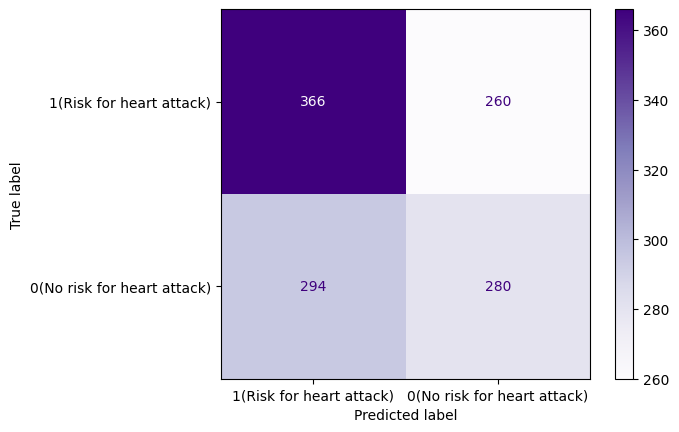

In [ ]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()


The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (366): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 366 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (260): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 260 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (294): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 294 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (280): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 280 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:


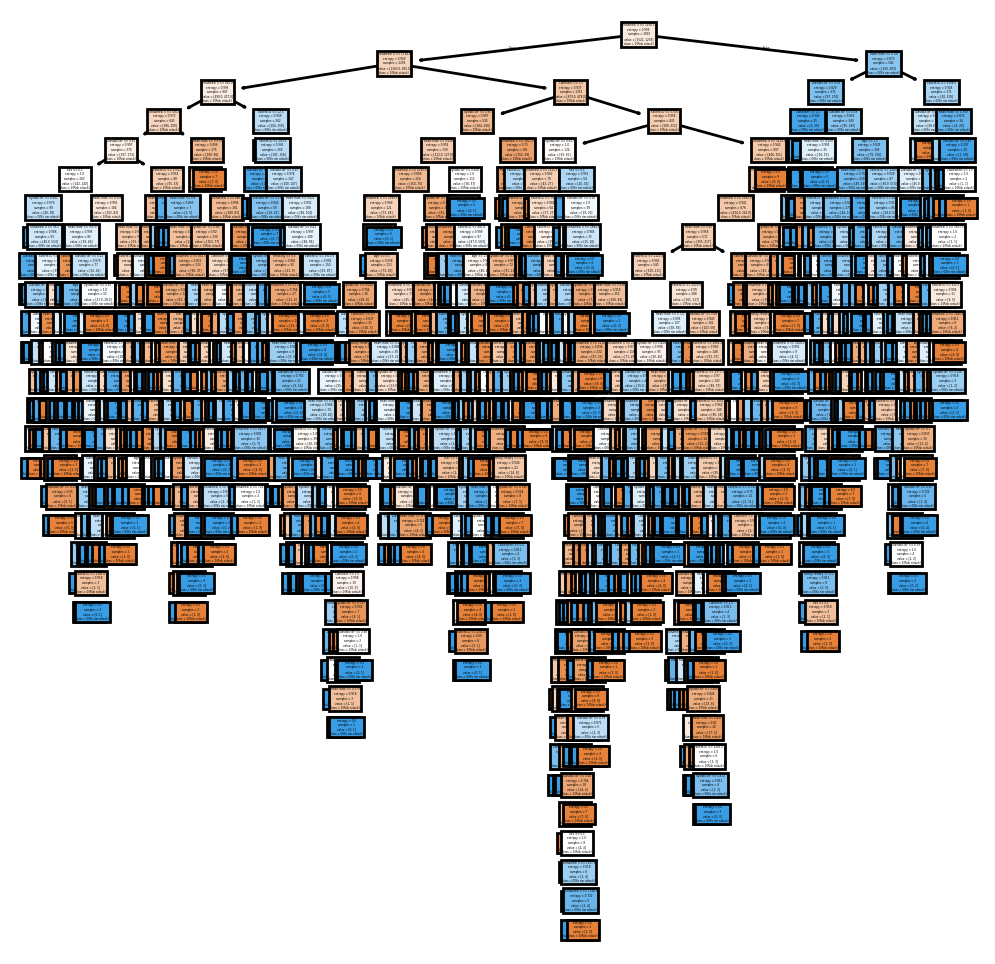

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf_entropy,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

# Completing in model evaluation and selection:


In [ ]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.5383333333333333
Error Rate: 0.46166666666666667
Sensitivity: 0.4878048780487805
Specificity: 0.5846645367412141
Precision: 0.5185185185185185


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 53%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 46%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 48%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 51%.

Results: The model shows moderate accuracy, successfully predicting the correct class classification for about 53% of cases.

At a sensitivity of 48%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 51%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.


# Splitting Data into: 60% Training and 40% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 60% training and 40% testing subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2. fit (X_train, y_train)

y_pred_entropy2 = clf2.predict (X_test)

# confusion matrix:


[[494 354]
 [373 379]]


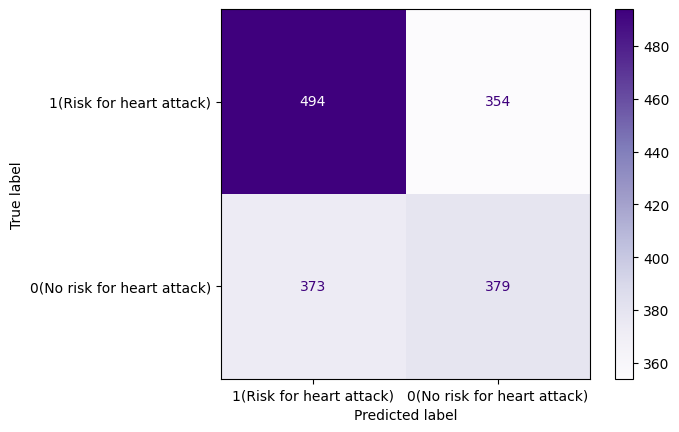

In [ ]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy2)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (494): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 494 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (354): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 354 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (373): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 373 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (379): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 379 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:


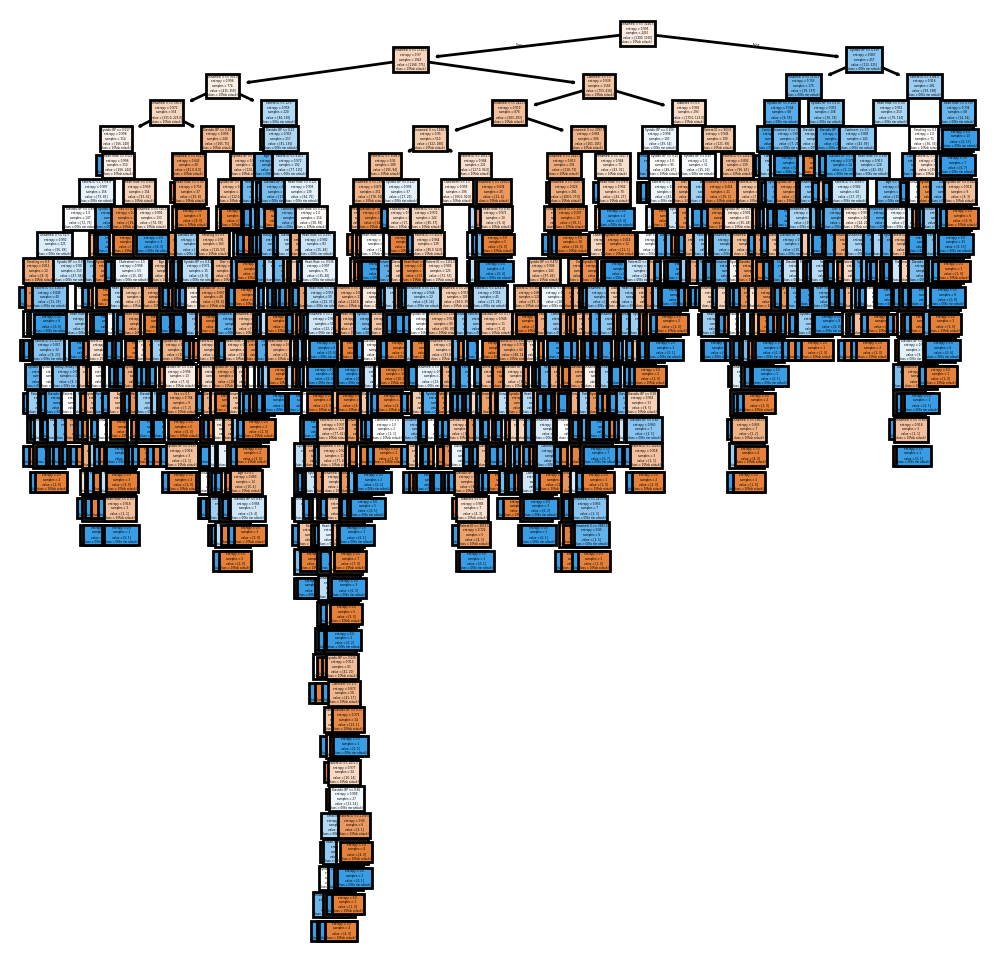

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

In this tree, data is split across multiple nodes representing decisions or conditions that lead to final classifications, in this case, "risk attack" and "no risk attack." Each node includes specific criteria and classification outcomes, with each level of the tree representing a decision step based on particular data features. This visualization helps in understanding the decision-making process and analyzing the data features in detail. However, it appears complex and somewhat difficult to read due to the tree’s depth and numerous branches, which suggests a complex model with many sub-decisions required to reach a final classification.

# Completing in model evaluation and selection:


In [ ]:

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy2)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.545625
Error Rate: 0.454375
Sensitivity: 0.5039893617021277
Specificity: 0.5825471698113207
Precision: 0.5170532060027285


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 54%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 45%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 50%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 51%.

Results: The model shows moderate accuracy, successfully predicting the correct class classification for about 54% of cases.

At a sensitivity of 50%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 51%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 80% Training and 20% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 80% training and 20% testing subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3. fit (X_train, y_train)

y_pred_entropy3 = clf3.predict (X_test)

# confusion matrix:


[[485 363]
 [378 374]]


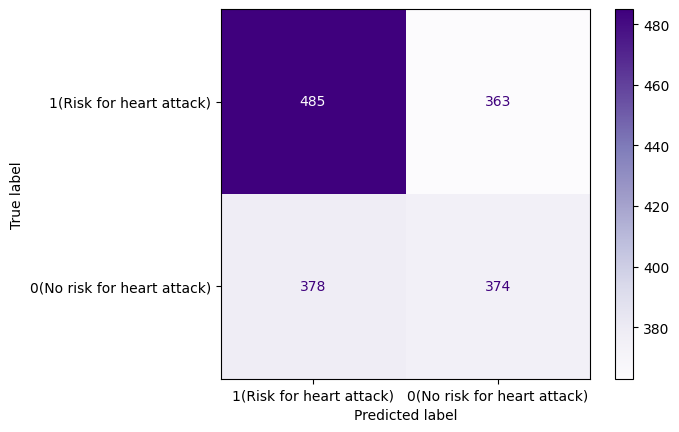

In [ ]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy3)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()


The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (485): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 485 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (363): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 363 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (378): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 378 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (374): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 374 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:


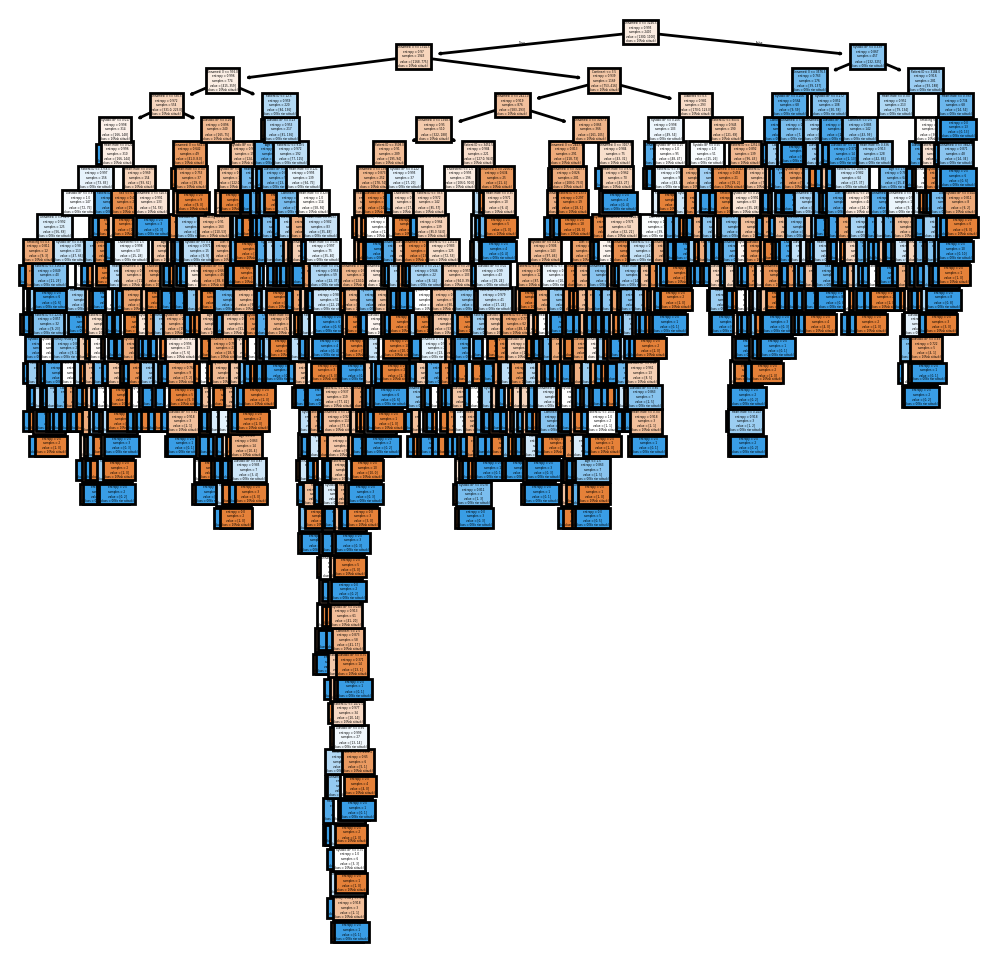

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

This image shows a complex Decision Tree used to classify data into two categories: "Risk attack" and "No risk attack." The tree starts from a root node, which represents the initial decision point, and branches out through multiple nodes that evaluate specific features or conditions in the data. At each node, the data is directed based on the results of these conditions until it reaches a leaf node, which represents the final classification.

While this tree provides a detailed view of the decision-making process, the high number of nodes and branches makes it challenging to read and interpret. This complexity reflects the model’s depth and the significant number of factors it analyzes to reach a classification decision. The visualization highlights both the model's power and the difficulty of manually tracing its decision

# Completing in model evaluation and selection:


In [ ]:

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy3)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.536875
Error Rate: 0.463125
Sensitivity: 0.4973404255319149
Specificity: 0.5719339622641509
Precision: 0.5074626865671642



- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 53%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 46%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 49%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 57%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 50%.

Results: The model shows moderate accuracy, successfully predicting the correct class classification for about 53% of cases.

At a sensitivity of 49%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 57%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 50%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# 5.1.2) GINI Index

# Splitting Data into 70% Training and 30% Test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_gini = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini = clf_gini.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

# confusion matrix


[[357 269]
 [307 267]]


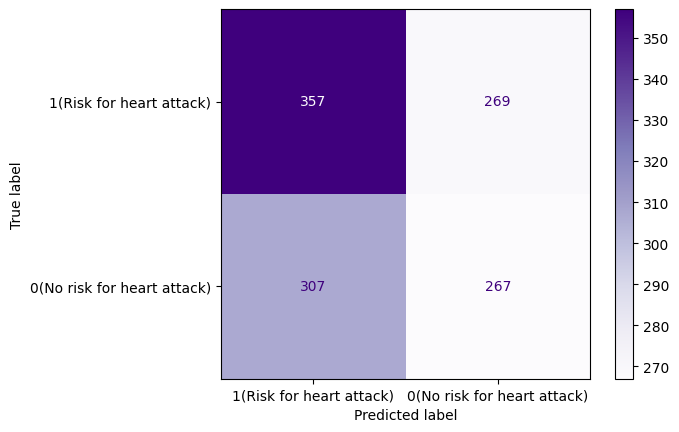

In [ ]:
# Compute and print the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
print(cm_gini)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

Top-left cell (357):Represents the number of true positives (TP). This indicates that 357 instances with a risk of heart attack were correctly identified as being at risk.

Top-right cell (269):Represents the number of false negatives (FN). This means that 269 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

Bottom-left cell (307): Represents the number of false positives (FP). This shows that 307 instances without a risk of heart attack were incorrectly predicted as being at risk.

Bottom-right cell (267):Represents the number of true negatives (TN). This means that 267 instances without a risk of heart attack were correctly identified as not being at risk.

# Decision Tree


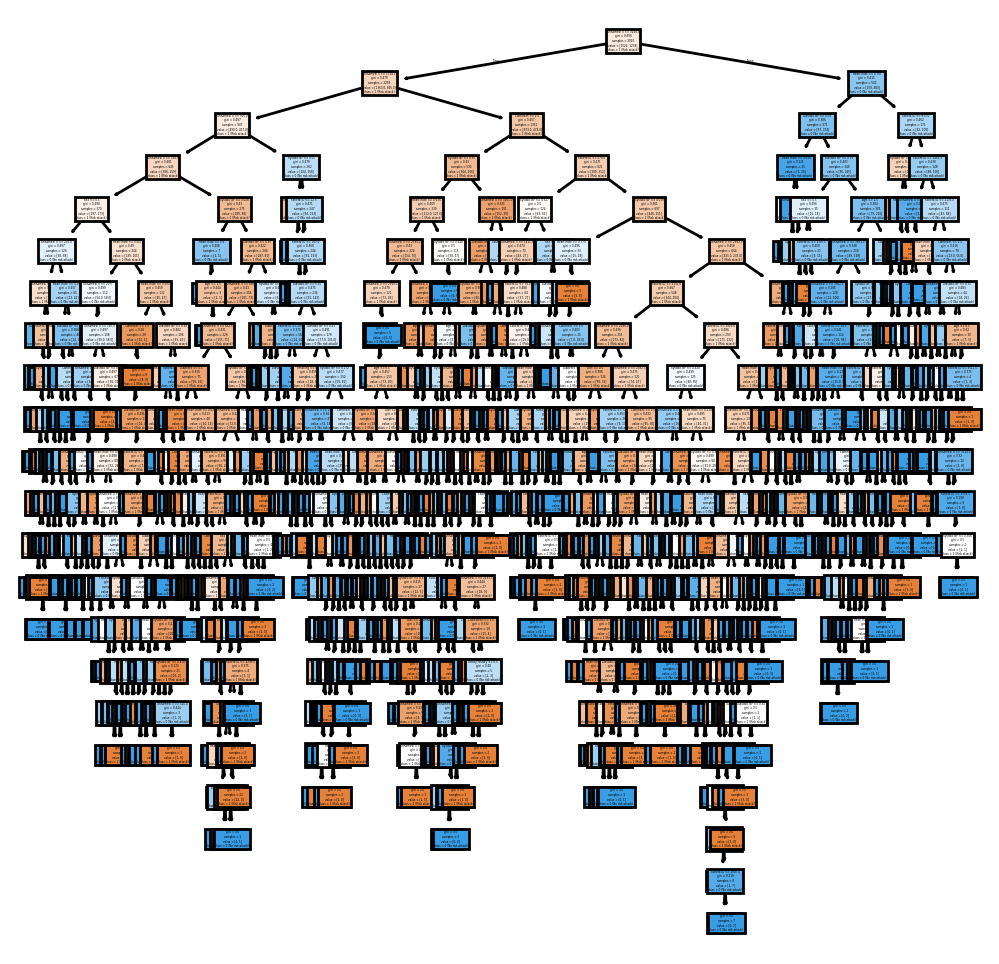

In [ ]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

This code is used to plot a decision tree for a classifier that has been trained using the Gini index as the criterion.

First, it sets up a plot with a figure size of 6x6 inches and a high resolution of 200 DPI. The class_labels dictionary maps class values 1 and 0 to their descriptive labels: 1 corresponds to "Risk attack" and 0 corresponds to "No risk attack."

These labels are then used to display meaningful class names in the decision tree plot. The resulting plot allows one to see how the decision tree classifies input data and makes decisions based on the Gini index criterion,Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack.

# Completing in model evaluation and selection:


In [ ]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini[1, 1]
TN = cm_gini[0, 0]
FP = cm_gini[0, 1]
FN = cm_gini[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.52
Error Rate: 0.48
Sensitivity: 0.4651567944250871
Specificity: 0.5702875399361023
Precision: 0.498134328358209


The results presented are metrics used to evaluate the performance of a classification model.

1-Accuracy :This represents the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. In this case, the model correctly predicted the class about 52% of the time, which indicates that its overall performance is slightly better than random guessing, but it's not very high.

2-Error Rate :The error rate is the complement of accuracy, representing the proportion of incorrect predictions made by the model. In this case, the model made errors in about 48% of the predictions. This value is high, suggesting the model may not be performing very well.

3-Sensitivity :also known as recall or true positive rate, measures the model's ability to correctly identify positive cases (1, "risk attack"), a sensitivity of 46.51% means that the model correctly identified approximately 47% of the actual positive cases, but it failed to identify more than half of the actual positives.

4-Specificity :also known as the true negative rate, measures the model's ability to correctly identify negative cases (0, "No risk attack"). A specificity of 57% means the model correctly identified the cases where there was no risk of an attack. This shows that the model is slightly better at identifying negative cases than positive ones.

5-Precision :measures how many of the positive predictions made by the model are actually correct. With a precision of 49%, the model's positive predictions are only about half correct. This suggests the model may have a significant number of false positives (incorrectly labeling non-risk cases as risk).

Overall, the model has moderate performance but struggles with identifying positive cases and has a high error rate.

# Splitting Data into: 60% Training and 40% Test:


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=1)

#Create decision tree classifer object:
clf_gini2 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini2 = clf_gini2.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred_gini2 = clf_gini2.predict(X_test1)

# Confusion Matrix


[[510 338]
 [364 388]]


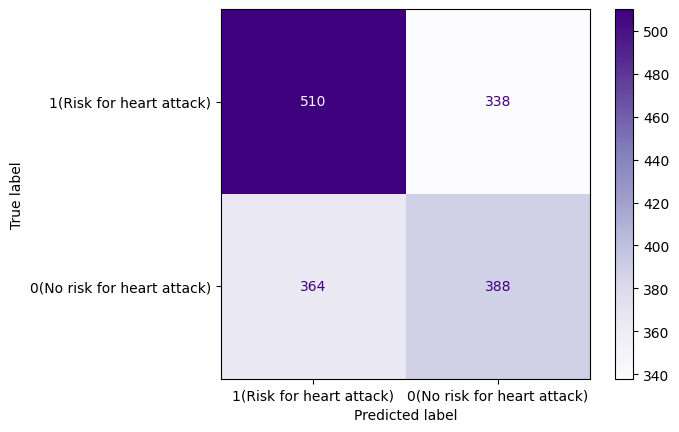

In [ ]:
# Compute and print the confusion matrix
cm_gini2= confusion_matrix(y_test1, y_pred_gini2)
print(cm_gini2)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini2, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()


The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

Top-left cell (510):Represents the number of true positives (TP). This indicates that 510 instances with a risk of heart attack were correctly identified as being at risk.

Top-right cell (338):Represents the number of false negatives (FN). This means that 338 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

Bottom-left cell (365): Represents the number of false positives (FP). This shows that 365 instances without a risk of heart attack were incorrectly predicted as being at risk.

Bottom-right cell (388):Represents the number of true negatives (TN). This means that 388 instances without a risk of heart attack were correctly identified as not being at risk.

# Decision Tree


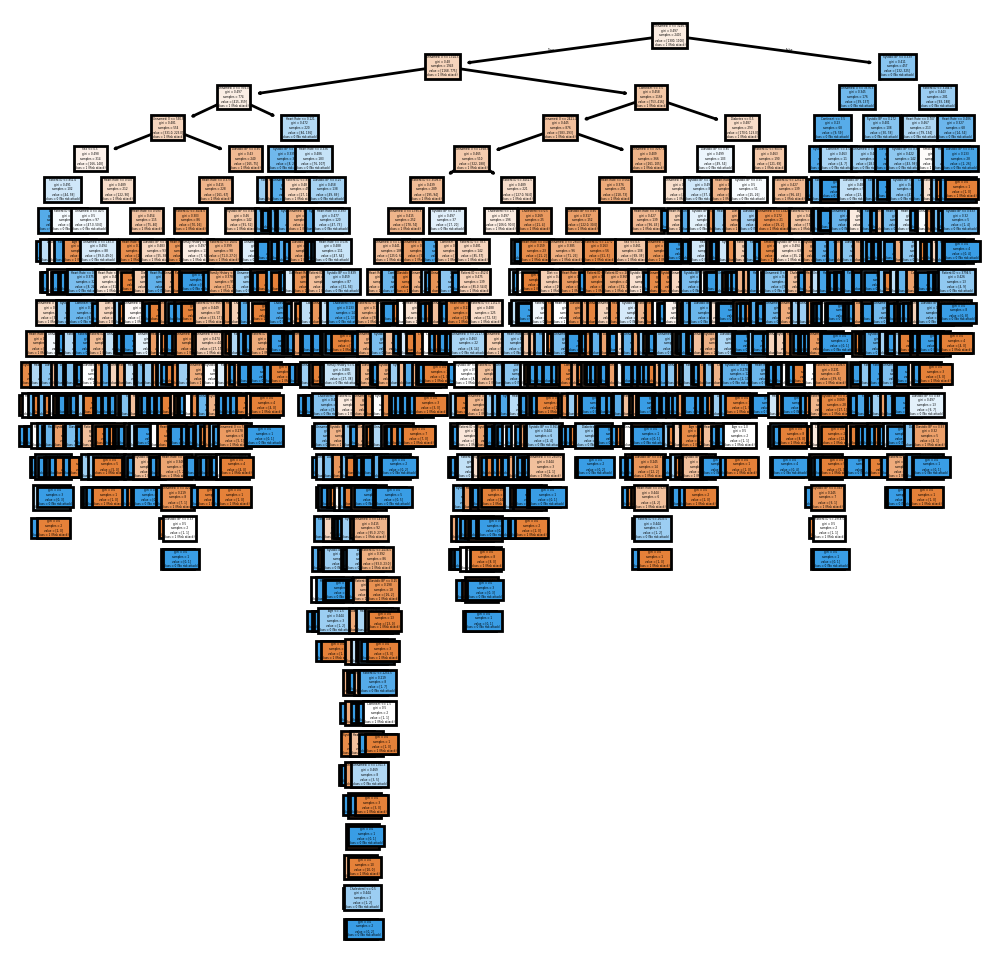

In [ ]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

A decision tree is a model used for classification or regression that splits data into subsets based on feature values, creating a tree-like structure.

In this code, a decision tree is plotted for a classifier trained using the Gini index as the splitting criterion. The class_labels dictionary maps the class values 1 and 0 to descriptive labels: 1 stands for "Risk attack" and 0 stands for "No risk attack."

These labels are used to show meaningful class names in the tree. The plot visualizes how the decision tree classifies input data, with each internal node representing a decision based on a feature, and the leaf nodes showing the final classification—either a risk or no risk of a heart attack.

# Completing in model evaluation and selection:


In [ ]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test1, y_pred_gini2)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini2[1, 1]
TN = cm_gini2[0, 0]
FP = cm_gini2[0, 1]
FN = cm_gini2[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.56125
Error Rate: 0.43875
Sensitivity: 0.5159574468085106
Specificity: 0.6014150943396226
Precision: 0.5344352617079889



These results provide key performance metrics for a classification model:

1-Accuracy : The model correctly predicted the outcome 56% of the time. This is a moderate level of accuracy, suggesting the model performs slightly better than random guessing.

2-Error Rate :The error rate is the complement of accuracy and represents the proportion of incorrect predictions. Here, 43% of the predictions were wrong, indicating the model makes errors almost as often as it gets predictions right.

3-Sensitivity : Also known as recall or true positive rate, it measures how well the model identifies positive cases. A sensitivity of 51% means the model correctly identifies just over half of the actual positive cases, but it misses nearly half of them.

4-Specificity :or true negative rate, measures the model’s ability to correctly identify negative cases. A specificity of 60% means the model successfully identifies about 58% of the true negative cases.

5-Precision : Precision measures how many of the predicted positive cases are actually correct. With a precision of 53%, the model's positive predictions are slightly more than half correct, meaning it also makes a significant number of false positives.

Overall Interpretation: The model shows moderate performance with an accuracy of 56%, indicating it has room for improvement. While its ability to identify negative cases is better than its ability to identify positive cases, both the sensitivity and precision are around 52%, suggesting the model struggles with balancing correct positive predictions while avoiding false positives. The error rate of 43% also indicates a significant number of misclassifications.

# Splitting Data into 80% Training and 20% Test


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

#Create decision tree classifer object:
clf_gini3 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini3 = clf_gini3.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_gini3 = clf_gini3.predict(X_test2)

# Confusion Matrix


[[226 183]
 [183 208]]


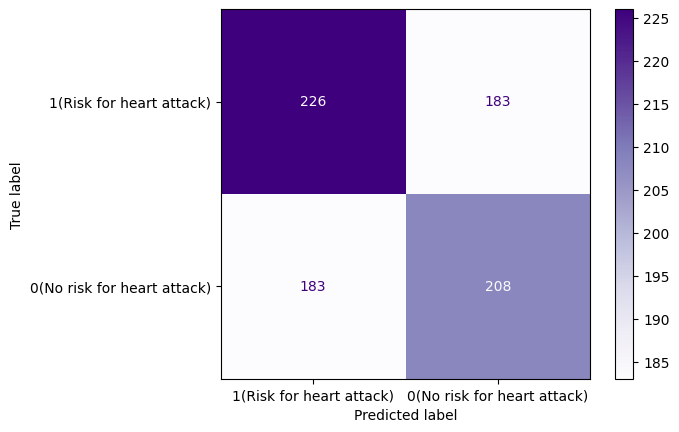

In [ ]:
# Compute and print the confusion matrix
cm_gini3 = confusion_matrix(y_test2, y_pred_gini3)
print(cm_gini3)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini3, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

Top-left cell (226):Represents the number of true positives (TP). This indicates that 226 instances with a risk of heart attack were correctly identified as being at risk.

Top-right cell (183):Represents the number of false negatives (FN). This means that 183 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

Bottom-left cell (183): Represents the number of false positives (FP). This shows that 183 instances without a risk of heart attack were incorrectly predicted as being at risk.

Bottom-right cell (208):Represents the number of true negatives (TN). This means that 208 instances without a risk of heart attack were correctly identified as not being at risk.

# Decision Tree


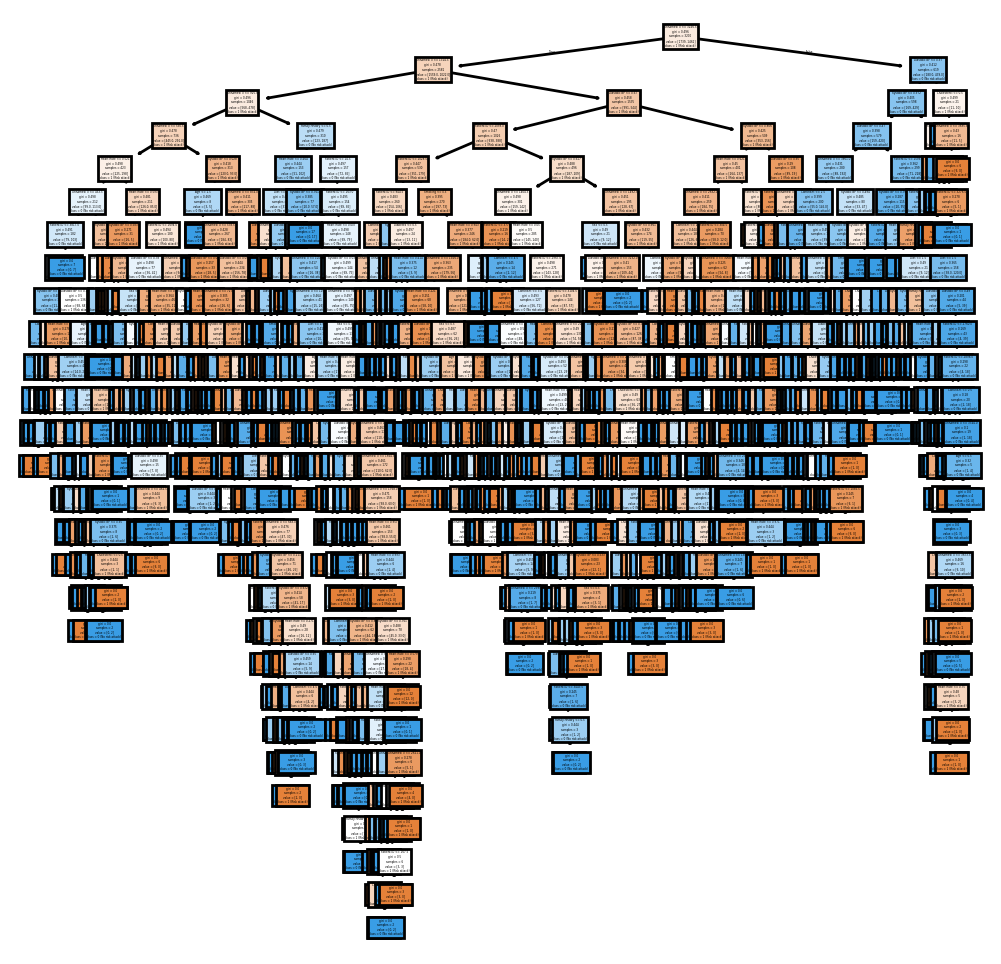

In [ ]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

A decision tree is a model used for classification or regression that splits data into subsets based on feature values, forming a tree-like structure.A decision tree is plotted for a classifier trained using the Gini index.The class values 1 and 0 to "Risk attack" and "No risk attack,".

The tree shows how the model classifies data, with each node representing a decision based on a feature. However, the tree is complex and difficult to read, making it challenging to interpret and use for decision-making.

# Completing in model evaluation and selection:


In [ ]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test2, y_pred_gini3)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini3[1, 1]
TN = cm_gini3[0, 0]
FP = cm_gini3[0, 1]
FN = cm_gini3[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.5425
Error Rate: 0.4575
Sensitivity: 0.5319693094629157
Specificity: 0.5525672371638142
Precision: 0.5319693094629157



These results represent key performance metrics for a classification model:

1-Accuracy : The model correctly predicted the outcome 54% of the time. This is a moderate level of accuracy, indicating that the model is correct just over half of the time.

2-Error Rate : The error rate is the complement of accuracy and shows the proportion of incorrect predictions. Here, 44% of the predictions were incorrect, meaning the model makes a significant number of errors.

3-Sensitivity : Also known as recall or the true positive rate, sensitivity measures the model's ability to correctly identify positive cases (risk of attack). A sensitivity of 53.19% means the model identifies just over half of the actual positive cases but misses the other half.

4-Specificity :or the true negative rate, indicates how well the model identifies negative cases (no risk of attack). A specificity of 52.25% means the model correctly identifies approximately 53% of the true negative cases.

5-Precision : Precision measures the accuracy of the model's positive predictions. With a precision of 53%, the model’s positive predictions are correct just over half of the time, meaning it also produces a substantial number of false positives.

Overall Interpretation: The model shows moderate performance with an accuracy of 54%. While its specificity is better than its sensitivity, indicating it is slightly better at identifying negative cases, both sensitivity and precision are just above 53%, suggesting it struggles with balancing false positives and false negatives. The relatively high error rate 45.75% suggests that the model could benefit from further improvements to make more accurate predictions.

# 5.2) Clustering



Clustering is an unsupervised learning process. It is a data analysis technique used to group a set of objects or data points into clusters according to how similar they are. The main goal is to ensure that items in the same cluster are more alike than those in other clusters. This similarity can be based on various attributes or features of the data. It is used for several important purposes:

1- Data Exploration: It helps in discovering patterns and structures within data, making it easier to understand the underlying relationships.

2- Dimensionality Reduction: : By grouping related things into clusters, data can be made simpler, which can aid in visualization or reducing complexity in machine learning models.

3- Recommendation Systems: Clustering helps in finding similar items or users, improving recommendations in systems like e-commerce or streaming services.

It is an effective technique for organizing and analyzing complex data, making it easier to uncover insights and patterns without needing pre-established labels or categories. It’s essential to carefully choose the clustering method and parameters to achieve meaningful results.

First, we removed the class label before clustering. For different reasons :

1- Nature of clustering: because clustering is unsupervised learning.

2- Focus on Feature Relationships: clustering algorithms analyze the relationships and distances between data points based on their features. And other reasons. Then we scale the features with a standard scaler. We use a standard scaler when features have different units or scales, as it ensures that no feature's scale dominates the others. Standard scaling leads to better model performance clustering.

In [ ]:
# Extract features (excluding the target variable)
features = df.drop('Heart Attack Risk', axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\n Scaled DataFrame:")
print(scaled_df.head())


 Scaled DataFrame:
   Unnamed: 0  Patient ID       Age       Sex   Cholesterol  Systolic BP  \
0   -1.731618   -1.522906  0.201549  0.659723     -1.772076     0.874913   
1   -1.730752   -1.337576  1.463205  0.659723     -0.205600     1.139754   
2   -1.729886   -1.517710  1.463205 -1.515787     -0.205600     1.480265   
3   -1.729020   -0.460293  0.201549  0.659723     -0.205600     1.064085   
4   -1.728154   -0.889841  0.201549  0.659723     -0.205600    -1.659997   

   Diastolic BP   Heart Rate  Diabetes  Family History   Smoking      Diet  \
0      0.188003    -0.143661 -1.376356       -0.982159  0.342973 -1.227402   
1      0.527297     1.133001  0.726556        1.018165  0.342973  1.237260   
2      0.934450    -0.143661  0.726556       -0.982159 -2.915680  0.004929   
3      1.002309    -0.094559  0.726556        1.018165  0.342973 -1.227402   
4      0.188003     0.887489  0.726556        1.018165  0.342973  1.237260   

   Continent  
0   1.614332  
1   0.984164  
2   0.353

**K-means Clustering** K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.


**Silhouette method** The Silhouette method measures how well each data point fits within its assigned cluster compared to neighboring clusters. The Silhouette score ranges from -1 to 1, with higher scores indicating better-defined and well-separated clusters.


**The Calinski-Harabasz Index** The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, considers both the within-cluster dispersion and the between-cluster dispersion to evaluate the clustering, where a higher Calinski-Harabasz Index indicates better clustering, as it suggests that the clusters are well-separated (high between-cluster variance) and compact (low within-cluster variance).


both these methods are useful for determining the optimal number of clusters (k) in a dataset, where they measure rhe clustering quality, such that the Silhouette Score focuses on the fit of individual data points to their assigned clusters, while the Calinski-Harabasz Index evaluates the overall quality of the clustering solution based on the balance of within-cluster and between-cluster variances.

In [ ]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10 that’s mean more than 3 times
silhouette_scores = []
calinski_harabasz_scores = []
wss_values = []  # To hold Within-cluster Sum of Squares
# Calculate silhouette score and Calinski-Harabasz score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
    print(f"Sillhoutte Score for K={k}: {silhouette_avg:.2f}")
    print(f"calinski harabasz score K={k}: {ch_score:.2f}")


    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(ch_score)
    wss_values.append(kmeans.inertia_)

Sillhoutte Score for K=2: 0.13
calinski harabasz score K=2: 433.69
Sillhoutte Score for K=3: 0.09
calinski harabasz score K=3: 363.46
Sillhoutte Score for K=4: 0.09
calinski harabasz score K=4: 370.12
Sillhoutte Score for K=5: 0.10
calinski harabasz score K=5: 317.71
Sillhoutte Score for K=6: 0.10
calinski harabasz score K=6: 293.76
Sillhoutte Score for K=7: 0.08
calinski harabasz score K=7: 249.23
Sillhoutte Score for K=8: 0.07
calinski harabasz score K=8: 228.19
Sillhoutte Score for K=9: 0.07
calinski harabasz score K=9: 216.28
Sillhoutte Score for K=10: 0.07
calinski harabasz score K=10: 199.75


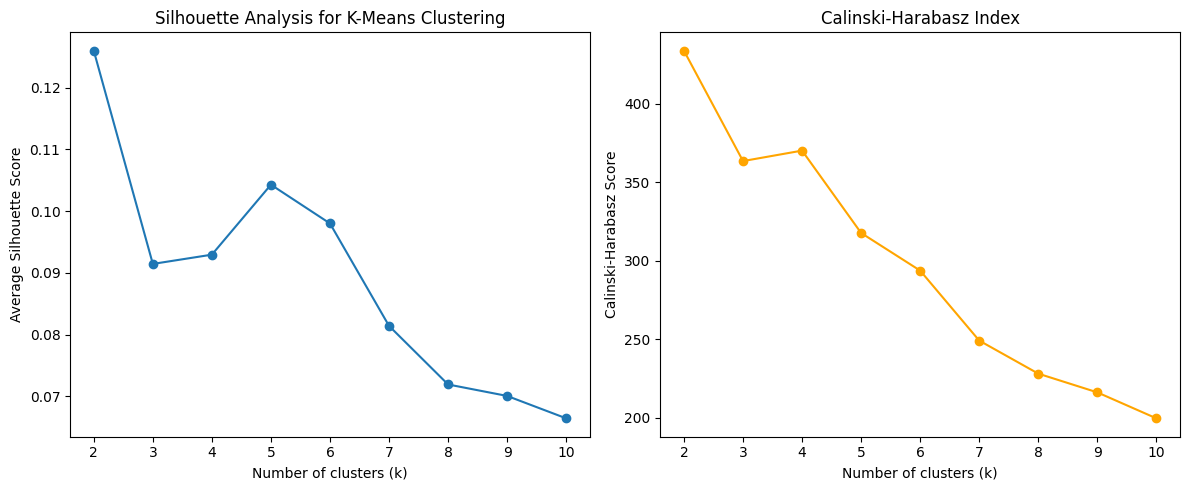

In [ ]:
# Plot the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')

# Calinski-Harabasz Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

The highest average Silhouette score is 0.12599557537154973 with k=2.

The second highest average Silhouette score is 0.1042966445238377 with k=5.

The highest Calinski-Harabasz score is 433.6893749551916 with k=2.

The second highest Calinski-Harabasz is 370.1212260951766 with k=4.

as you can see above We found that the optimal number of clusters (k) maximizing the average Silhouette coefficient and Calinski-Harabasz score is 2.

**The Elbow method** The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.

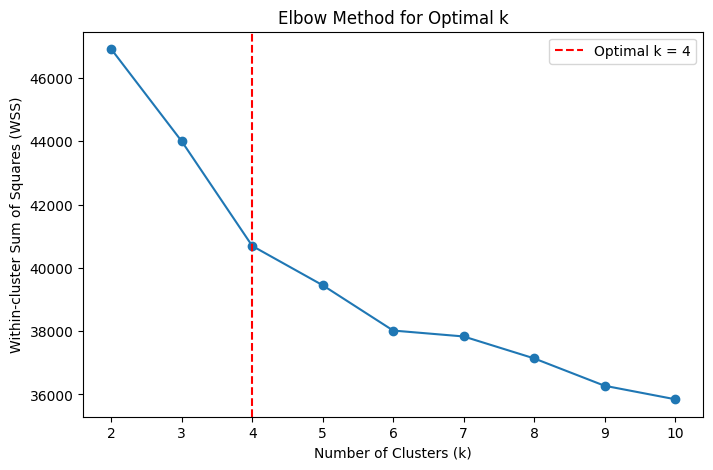

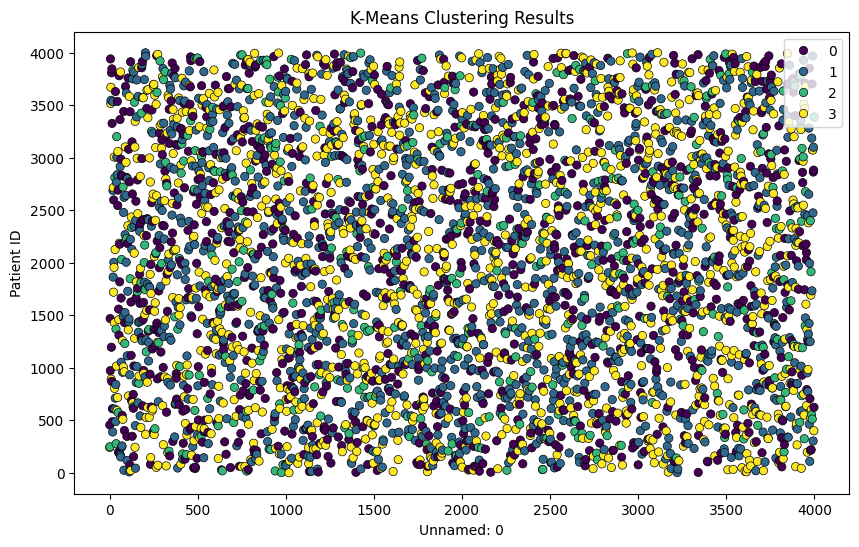

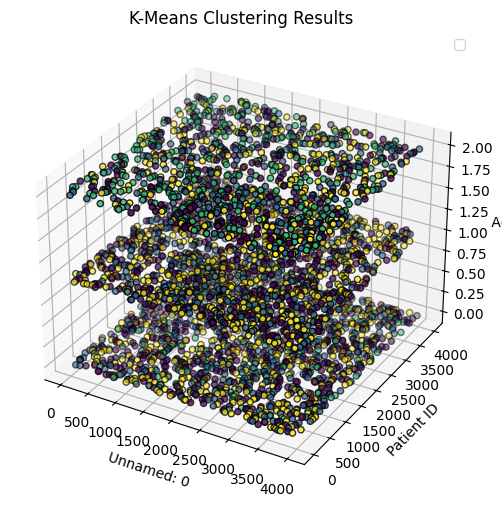

In [ ]:

# Elbow Method for optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.axvline(x=4, linestyle='--', color='red', label='Optimal k = 4')
plt.legend()
plt.show()

# Fit KMeans with the optimal K (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize clustering using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', edgecolor='k')
plt.title("K-Means Clustering Results")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()


# Visualize clustering using a scatter plot using 3D (for more clarification)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['Cluster'], cmap='viridis', edgecolor='k')

# Set labels and title
ax.set_title("K-Means Clustering Results")
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

# Add legend
ax.legend()

# Show the plot
plt.show()

The Elbow Method analysis of the WSS curve points to 4 as the optimal number of clusters for this dataset, as this is the value where the curve starts to plateau and exhibit diminishing returns from adding more clusters.

# K = 2

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-3.58436717e-02  6.01612802e-03 -1.27231635e-03 -1.51578667e+00
  -1.57632283e-02  4.00246276e-03 -2.93915089e-02  1.86235034e-02
  -2.58460570e-02 -2.07502703e-02 -7.88018415e-01  1.20408800e-02
   1.94311610e-02]
 [ 1.56004211e-02 -2.61842960e-03  5.53756633e-04  6.59723442e-01
   6.86070896e-03 -1.74201196e-03  1.27922140e-02 -8.10560086e-03
   1.12491091e-02  9.03124431e-03  3.42973210e-01 -5.24061265e-03
  -8.45712174e-03]]

Cluster Labels:
[1 1 0 ... 1 1 0]


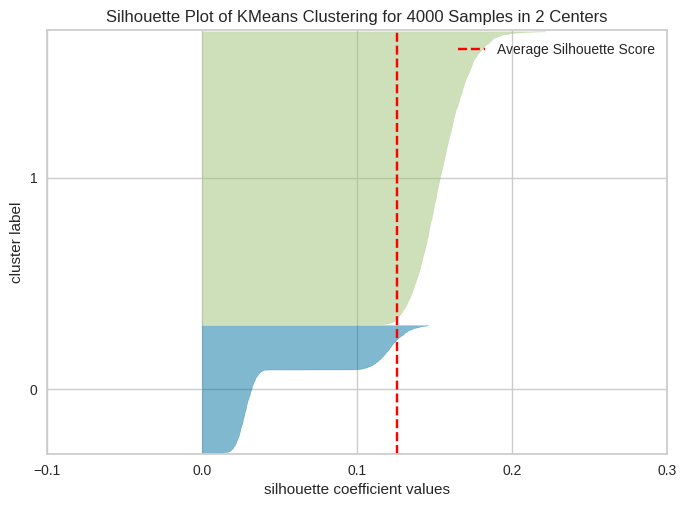

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

# K = 3

In [85]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-1.13724978e-02  3.06194502e-03  7.73939314e-01 -1.51578667e+00
   1.02090692e-02  3.07816113e-02  2.63344577e-02  5.65971391e-02
  -4.26801274e-02 -7.94000372e-02 -2.91567962e+00  2.54193889e-02
   8.22772762e-03]
 [-1.66318263e-02  2.36457456e-03 -8.76696074e-02  1.94426626e-01
  -6.89454318e-03 -8.66641061e-03 -4.80994687e-04 -1.41181560e-02
  -1.38890296e-02  2.02785983e-02  3.42973210e-01 -3.36248323e-02
  -8.89490957e-01]
 [ 1.86856519e-02 -2.99066498e-03 -9.42917525e-02  1.62737057e-01
   4.29576540e-03  1.25013262e-03 -5.62395278e-03  5.44932867e-04
   2.32758087e-02 -1.22040640e-03  3.42973210e-01  2.65847844e-02
   8.56815612e-01]]

Cluster Labels:
[2 2 0 ... 1 1 0]


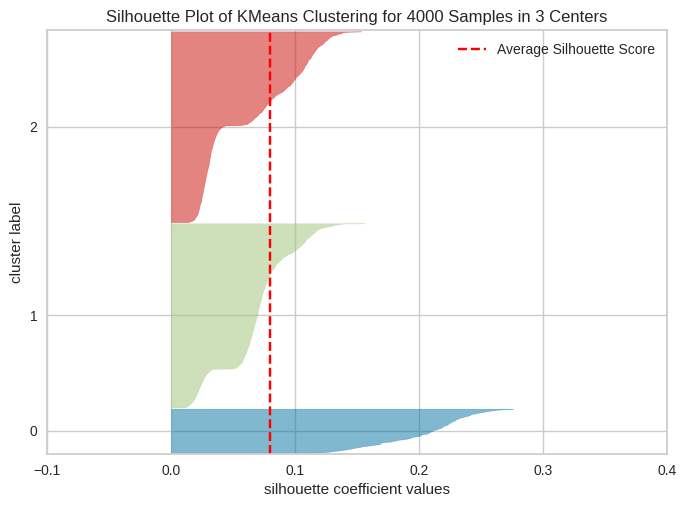

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [86]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

# K = 5

In [87]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=5
kmeans = KMeans(n_clusters=5, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-4.88517073e-02  7.58647025e-03 -4.13348196e-01 -1.51578667e+00
  -2.95692096e-02 -1.02324129e-02 -5.90135189e-02 -1.56197722e-03
  -1.68976433e-02  1.04259316e-02  3.42973210e-01  4.92932415e-03
   2.53865214e-02]
 [-4.65915921e-02 -2.79201990e-02  2.11131426e-02  6.59723442e-01
   2.53770825e-02 -5.22835461e-02  7.51637909e-04 -6.53391314e-03
   7.26556179e-01  2.24382251e-02  3.42973210e-01 -6.61141503e-02
  -9.00749370e-01]
 [ 3.02392604e-02  1.44252849e-02 -1.25414856e-02  6.59723442e-01
  -9.99944898e-03 -3.36799295e-02  7.31155165e-03 -2.83204925e-02
   7.26556179e-01 -8.68230313e-03  3.42973210e-01  2.99178937e-02
   8.44948891e-01]
 [-1.13724978e-02  3.06194502e-03  7.73939314e-01 -1.51578667e+00
   1.02090692e-02  3.07816113e-02  2.63344577e-02  5.65971391e-02
  -4.26801274e-02 -7.94000372e-02 -2.91567962e+00  2.54193889e-02
   8.22772762e-03]
 [ 6.03056991e-02  4.60966701e-03 -6.06472869e-03  6.59723442e-01
   5.90733246e-03  7.79144148e-02  2.96656108e-02

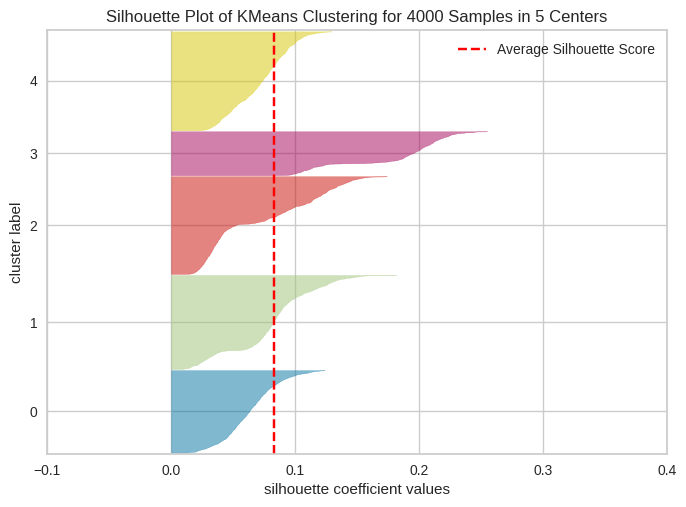

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [88]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

In conclusion, we've decided that K=2 is the best choice for our clustering model based on the metrics we've analyzed(WSS, Average Sihouette Score, Visualization of K-mean). du to K=2 being the highest silhouette width, also having the highest value of WSS.

# Conclusion

  We utilized both supervised and unsupervised learning methods on our data through the use of classification and clustering techniques.



  **For our classification task**, we used a decision tree. This recursive algorithm creates a tree structure where each leaf node corresponds to a final decision. Our model aims to predict whether a person is at risk of a heart attack, categorizing the results into ("1" meaning high risk) or ("0" meaning low risk). It makes predictions based on several attributes: Patient ID, Age, Sex, Cholesterol, Systolic BP, Diastolic BP, Heart Rate, Diabetes, Family History, Smoking, Diet, and Continent.

  As we touched on before, classification is a type of supervised learning, so we need training data to train the model. We split our dataset into two subsets: training data and testing data. We tried three different sizes of training subsets: 70%, 60%, and 80%, and used two attribute selection measures (Information Gain (Entropy) and Gini Index). To evaluate our model and determine the best partitioning, we used accuracy_score to measure overall performance, and a confusion matrix to summarize basic performance evaluation measures such as sensitivity, specificity, precision, and error rate.


For implementing classification, we utilized the following Python libraries:

 • pandas for data loading and preprocessing.

 • sklearn for DecisionTreeClassifier, train_test_split, accuracy_score, and confusion_matrix.

• matplotlib.pyplot for trees visualization.


`
`



**In the clustering process**, which is a type of unsupervised learning, we omitted the “Heart Attack Risk” class label attribute since clustering does not use class labels. Instead, we utilized all other attributes such as: Patient ID, Age, Sex, Cholesterol, Systolic BP, Diastolic BP, Heart Rate, Diabetes, Family History, Smoking, Diet, and Continent. All of these attributes are numeric, or were converted to numeric values where needed, prior to clustering.


  For creating the clusters, we employed the K-means algorithm. To determine the optimal number of clusters (k), we used the Elbow Method, which plots the within-cluster sum of squares (WSS) against the number of clusters. The “elbow point” is the value of k at which the WSS starts to level off, indicating diminishing returns in cluster compactness with increasing k. From the plot, we determined the optimal number of clusters to be 4.




 We then fit the K-means algorithm with the optimal k (k=4), assigning each observation to its nearest cluster. After assigning cluster labels to each data point, we visualized the clustering results using 2D scatter plots (via seaborn) and 3D scatter plots (via matplotlib) for better clarity and interpretation.

  For cluster validation, we calculated the average silhouette score of each cluster using the silhouette_score method from scikit-learn to assess the quality of separation and cohesion among the clusters. Additionally, the WSS values helped us evaluate the compactness of the clusters at different k values to confirm the stability of our choice for the optimal number of clusters.



For implementing clustering, we used:

 • pandas for data handling.

 • scikit-learn for KMeans and silhouette_score.

 • matplotlib and seaborn for visualization.

• numpy for setting the random seed.

• yellowbrick.cluster for visualization SilhouetteVisualizer.




# 6.	Evaluation and Comparison:


# 6.1) Classification

# 6.1.1) INFORMATION GAIN

In [ ]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.5383333333333333", "0.46166666666666667", " 0.4878048780487805", "0.5846645367412141", "0.5185185185185185"
    ],
    "60% training, 40% testing	": [
        "0.545625", "0.454375", "0.5039893617021277", "0.5825471698113207",
        "0.5170532060027285 "
    ],
    "	80% training, 20% testing": [
        "0.536875", "0.463125", "0.4973404255319149", "0.5719339622641509","0.5074626865671642"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

The Information Gain results show the following model performance across different data splits for training and testing:

Accuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.545625 (or 54.56%), followed by the model trained on 70% training and 30% testing with an accuracy of 0.538333 (or 53.833%), and the model trained on 8% training and 20% testing with an accuracy of 0.5386 (or 53.68%).

Error Rate: The model trained on a 80% training set and 20% testing set had the highest error rate at 0.463125 (or 46.31%), followed by the model trained on 70% training and 30% testing with an error rate of 0.46166 (or 46.16%), and the model trained on 60% training and 40% testing with an error rate of 0.454375 (or 45.43%).

Sensitivity: The model trained on a 60% training set and 40% testing set achieved the highest sensitivity at 0.5039893617021277 (or 50.39%), followed by the model trained on 80% training and 20% testing with 0.4973404255 (or 49.73%), and the model trained on 70% training and 30% testing with 0.4878048780487 (or 48.78%).

Specificity: The model trained on an 70% training set and 30% testing set obtained the highest specificity at 0.5846645367 (or 58.46%), followed by the model trained on 60% training and 40% testing with 0.582547169 (or 58.25%), and the model trained on 80% training and 20% testing with 0.57193396 (or 57.19%).

Precision: The model trained on a 70% training set and 30% testing set achieved the highest precision at 0.5185185185185185 (or 51.85%), followed by the model trained on 60% training and 40% testing with 0.51705320 (or 51.70%), and the model trained on 80% training and 20% testing with 0.507462686 (or 50.74%).

Based on the values, the 60% training and 40% testing split appears to be the best choice for the model. This split achieves the highest accuracy (54.56%)), which is typically a primary metric for assessing overall model performance. It also achieves the highest sensitivity (50.39%), Also second Specificity(58.25%) and precision (51.70%), meaning it is effective at correctly identifying positive cases and minimizing false positives. Additionally, the error rate for this split (45.43%) is the lowest among the three splits, indicating fewer incorrect predictions. Overall, this balance between sensitivity, specificity, and accuracy suggests it is well-suited for maintaining reliable predictions across different metrics.

6.1.2) GINI Index

In [83]:
import jinja2

data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],

    "70% training, 30% testing": [
        " 0.52", "0.48", "0.4651567944250871", "0.5702875399361023", " 0.498134328358209"
    ],
    "60% training, 40% testing	": [
        "0.56125", "0.43875", "0.5159574468085106", "0.6014150943396226",
        "0.5344352617079889"
    ],
    "	80% training, 20% testing": [
        "0.5425", "0.4575", "0.5319693094629157", "0.5525672371638142","0.5319693094629157"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

Using these four metrics, we can determine which model is better suited for making predictions.

Accuracy: Measures the overall correctness of the model by calculating the ratio of correctly predicted observations to the total observations.

Error Rate: Represents the proportion of incorrect predictions made by the model. Sensitivity (Recall): Reflects the model's ability to correctly identify positive cases (true positives). It focuses on reducing false negatives.

Specificity: Measures the ability of the model to correctly identify negative cases (true negatives). It focuses on reducing false positives.

Precision: Indicates the proportion of positive identifications that were actually correct. It focuses on reducing false positives.

The results show the following model performance across different data splits for training and testing:

Accuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.56125 (or 56.12%), followed by the model trained on 80% training and 20% testing with an accuracy of 0.5425 (or 54.25%), and the model trained on 70% training and 30% testing with an accuracy of 0.52 (or 52%).

Error Rate: The model trained on a 70% training set and 30% testing set had the highest error rate at 0.48	 (or 48%), followed by the model trained on 80% training and 20% testing with an error rate of 0.4575 (or 45.75%), and the model trained on 60% training and 40% testing with an error rate of 0.43875 (or 43.87%).

Sensitivity: The model trained on a 80% training set and 20% testing set achieved the highest sensitivity at 0.53196930 (or 53.19%), followed closely by the model trained on 60% training and 40% testing with a sensitivity of 0.515957446 (or 51.59 %), and the model trained on 70% training and 30% testing with a sensitivity of 0.465156794 (or 46.51%).

Specificity: Specificity remained consistent across all splits, with the model trained on 60% training and 40% testing achieving 0.60141509433 (or 60.14%), followed by 70% training and 30% testing with 0.5702875399 (or 57.02%), and 80% training and 20% testing with 0.5525672371 (or 55.25%).

Precision: The model trained on an 60% training set and 40% testing set obtained the highest precision at 0.53443526170 (or 53.44%), followed by the model trained on 80% training and 20% testing with 0.531969309 (or 53.19%), and the model trained on 70% training and 30% testing with 0.49813432 (or 49.81%).

Analysis:
Based on these metrics, the 60% training and 40% testing split appears to be the best choice for the model. This split achieves the highest accuracy (6.12%), Specificity (60.14%) and Precision(or 53.44%) which are key metrics for assessing overall performance and the ability to correctly identify positive cases.

Furthermore, it has the lowest error rate (43.87%), ensuring fewer incorrect predictions. While the 80%-20% split performs slightly better in Sensitivity, the balance provided by the 60%-40% split across all metrics suggests it is better suited for reliable predictions.

# 6.2) Clustering

In [89]:
import pandas as pd

data = {
    " ": ["WSS", "Silhouette"],
    "k=2": ["46911", "0.125"],
    "k=3": ["43998", "0.091"],
    "k=5": ["39450", "0.104"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

# 7.Findings
# 7.1. Classification:

 First, our team chose a dataset containing crucial health information about individuals. Our objective was to leverage this data to predict the likelihood of a person's risk of having a heart attack. By doing so, we hope to empower individuals with valuable insights and preventive strategies to enhance their health management and reduce the risk of heart-related issues.

To guarantee precise and trustworthy outcomes, we implemented several preprocessing methods to improve the quality of the dataset. By using these methods, we were able to prepare the data for additional analysis and optimize it. Furthermore, we utilized various visualization techniques to examine the dataset visually, which helped us gain a clearer insight into its features and identify the most suitable preprocessing steps.

After thoroughly examining the dataset visually, including the plots, we checked for any outliers or missing values. We found that there were neither outliers nor missing values that could negatively impact the accuracy of our predictions. With this confirmation, we proceeded to perform data transformation, including normalizing and discretizing certain attributes, ensuring that all features were treated equally, and making the data easier to understand for subsequent analysis. The goal of these actions was to create a predictive model that would be accurate and dependable so that people could make well-informed choices for better living.

After the preprocessing stage, we implemented various methods, including the Gini index, and information gain, in combination with different partitioning techniques. We carefully analyzed the results of each method to determine the best approach for our dataset.



# 7.1.1 	INFORMATION GAIN:

In [90]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.5383333333333333", "0.46166666666666667", " 0.4878048780487805", "0.5846645367412141", "0.5185185185185185"
    ],
    "60% training, 40% testing	": [
        "0.545625", "0.454375", "0.5039893617021277", "0.5825471698113207",
        "0.5170532060027285 "
    ],
    "	80% training, 20% testing": [
        "0.536875", "0.463125", "0.4973404255319149", "0.5719339622641509","0.5074626865671642"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

The Information Gain results show the following model performance across different data splits for training and testing:

-	Accuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.545625 (or 54.56%), followed by the model trained on 70% training and 30% testing with an accuracy of 0.538333 (or 53.833%), and the model trained on 8% training and 20% testing with an accuracy of 0.5386 (or 53.68%).

-	Error Rate: The model trained on a 80% training set and 20% testing set had the highest error rate at 0.463125 (or 46.31%), followed by the model trained on 70% training and 30% testing with an error rate of 0.46166 (or 46.16%), and the model trained on 60% training and 40% testing with an error rate of 0.454375 (or 45.43%).

-	Sensitivity: The model trained on a 60% training set and 40% testing set achieved the highest sensitivity at 0.5039893617021277 (or 50.39%), followed by the model trained on 80% training and 20% testing with 0.4973404255 (or 49.73%), and the model trained on 70% training and 30% testing with 0.4878048780487 (or 48.78%).

-	Specificity: The model trained on an 70% training set and 30% testing set obtained the highest specificity at 0.5846645367 (or 58.46%), followed by the model trained on 60% training and 40% testing with 0.582547169 (or 58.25%), and the model trained on 80% training and 20% testing with 0.57193396 (or 57.19%).

-	Precision: The model trained on a 70% training set and 30% testing set achieved the highest precision at 0.5185185185185185 (or 51.85%), followed by the model trained on 60% training and 40% testing with 0.51705320 (or 51.70%), and the model trained on 80% training and 20% testing with 0.507462686 (or 50.74%).

Based on the values, the 60% training and 40% testing split appears to be the best choice for the model. This split achieves the highest accuracy (54.56%), which is typically a primary metric for assessing overall model performance. It also achieves the highest sensitivity (50.39%), Also second Specificity (58.25%) and precision (51.70%), meaning it is effective at correctly identifying positive cases and minimizing false positives. Additionally, the error rate for this split (45.43%) is the lowest among the three splits, indicating fewer incorrect predictions. Overall, this balance between sensitivity, specificity, and accuracy suggests it is well-suited for maintaining reliable predictions across different metrics.



# 7.1.2 GINI INDEX:

In [91]:
import jinja2

data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],

    "70% training, 30% testing": [
        " 0.52", "0.48", "0.4651567944250871", "0.5702875399361023", " 0.498134328358209"
    ],
    "60% training, 40% testing	": [
        "0.56125", "0.43875", "0.5159574468085106", "0.6014150943396226",
        "0.5344352617079889"
    ],
    "	80% training, 20% testing": [
        "0.5425", "0.4575", "0.5319693094629157", "0.5525672371638142","0.5319693094629157"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

Using these four metrics, we can determine which model is better suited for making predictions.

Accuracy: Measures the overall correctness of the model by calculating the ratio of correctly predicted observations to the total observations.

Error Rate: Represents the proportion of incorrect predictions made by the model. Sensitivity (Recall): Reflects the model's ability to correctly identify positive cases (true positives). It focuses on reducing false negatives.

Specificity: Measures the ability of the model to correctly identify negative cases (true negatives). It focuses on reducing false positives.

Precision: Indicates the proportion of positive identifications that were actually correct. It focuses on reducing false positives.

The results show the following model performance across different data splits for training and testing:

-	Accuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.56125 (or 56.12%), followed by the model trained on 80% training and 20% testing with an accuracy of 0.5425 (or 54.25%), and the model trained on 70% training and 30% testing with an accuracy of 0.52 (or 52%).

-	Error Rate: The model trained on a 70% training set and 30% testing set had the highest error rate at 0.48 (or 48%), followed by the model trained on 80% training and 20% testing with an error rate of 0.4575 (or 45.75%), and the model trained on 60% training and 40% testing with an error rate of 0.43875 (or 43.87%).

-	Sensitivity: The model trained on a 80% training set and 20% testing set achieved the highest sensitivity at 0.53196930 (or 53.19%), followed closely by the model trained on 60% training and 40% testing with a sensitivity of 0.515957446 (or 51.59 %), and the model trained on 70% training and 30% testing with a sensitivity of 0.465156794 (or 46.51%).

-	Specificity: Specificity remained consistent across all splits, with the model trained on 60% training and 40% testing achieving 0.60141509433 (or 60.14%), followed by 70% training and 30% testing with 0.5702875399 (or 57.02%), and 80% training and 20% testing with 0.5525672371 (or 55.25%).

-	Precision: The model trained on an 60% training set and 40% testing set obtained the highest precision at 0.53443526170 (or 53.44%), followed by the model trained on 80% training and 20% testing with 0.531969309 (or 53.19%), and the model trained on 70% training and 30% testing with 0.49813432 (or 49.81%).

Analysis: Based on these metrics, the 60% training and 40% testing split appears to be the best choice for the model. This split achieves the highest accuracy (56.12%), Specificity (60.14%) and Precision (or 53.44%) which are key metrics for assessing overall performance and the ability to correctly identify positive cases.
Furthermore, it has the lowest error rate (43.87%), ensuring fewer incorrect predictions. While the 80%-20% split performs slightly better in Sensitivity, the balance provided by the 60%-40% split across all metrics suggests it is better suited for reliable predictions.


# The best model between information gain and the Gini index:

 After selecting the best model split from Information Gain, which was 60% training, 40% testing, and the best split from Gini Index, which was 60% training, 40% testing, we reviewed the values of each for comparison between Information Gain and Gini Index, and we reached the following conclusion:

In [92]:
import jinja2

data = {
        " ": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],

    "Imformation gain": [
        " 0.545625", "0.454375", "0.5039893617021277", "0.5825471698113207", " 0.5170532060027285"
    ],
    "Gini index	": [
        "0.56125", "0.43875", "0.5159574468085106", "0.6014150943396226",
        "0.5344352617079889"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

# Accuracy and Error Rate:
The Gini Index split provides a higher accuracy (56%) compared to Information Gain (54%). This leads to a lower error rate for the Gini Index model (43%) compared to Information Gain (45%). This indicates that the Gini Index model performs better in terms of correctly classifying cases, making it a more reliable model for this task.

# Sensitivity and Specificity:

In terms of sensitivity, the Gini Index split slightly outperforms the Information Gain split with a sensitivity of 51% compared to 50% for Information Gain. Sensitivity reflects the model's ability to correctly identify positive cases. However, the difference is minimal.
For specificity, the Gini Index has a slightly better result (60%) compared to Information Gain split (58%). Specificity refers to the model's ability to correctly identify negative cases. So, Gini Index is slightly better at identifying negatives.


# Precision:

The Gini Index provides a slightly higher precision (53%) compared to Information Gain (51%), meaning that when the model predicts a positive case, it is correct 53% of the time for Gini Index, compared to 51% for Information Gain.


**Based on these reasons**, it can be concluded that the 60%-40% split using the Gini Index yields better overall performance, with high accuracy, low error rate, and high values for sensitivity, and precision.
 This was the decision tree associated with this division:


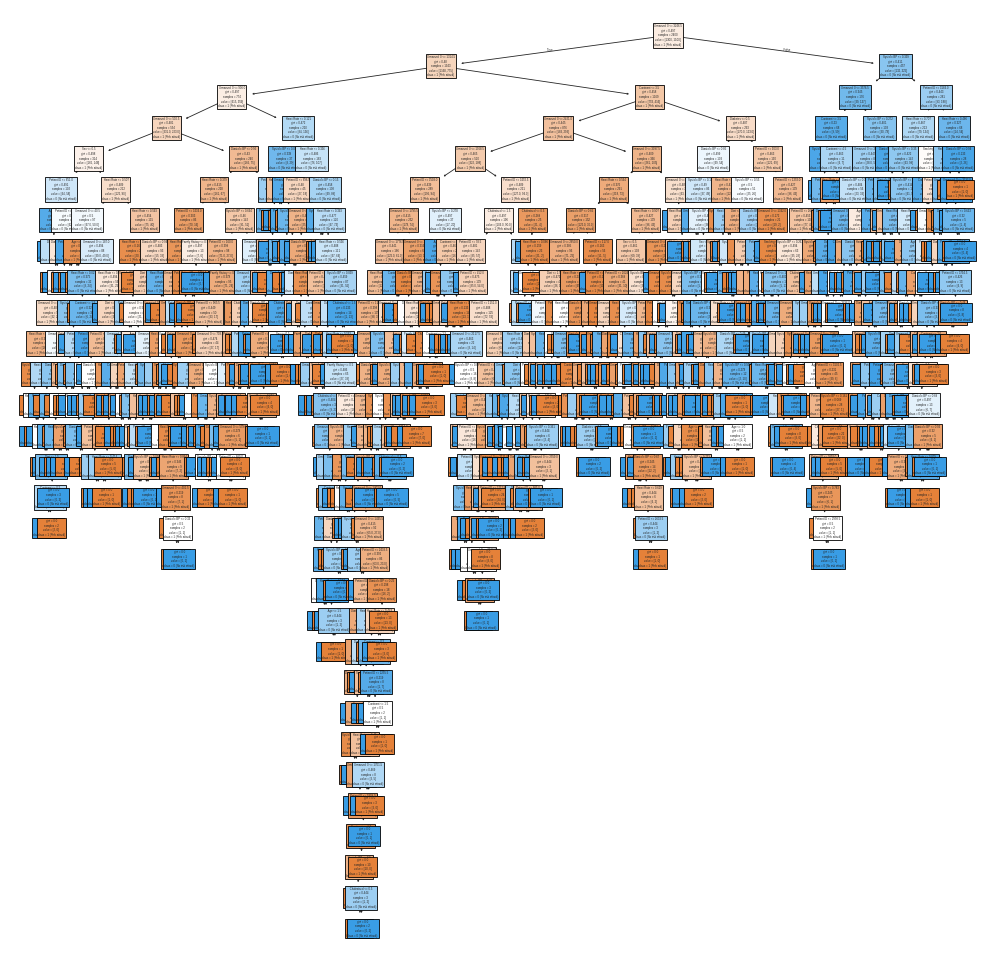

In [93]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

This decision tree classifier, trained using the Gini index as the splitting criterion, offers an intuitive way to predict heart attack risk based on various patient features. By using the class_label dictionary maps the class values 1 and 0 to descriptive labels: 1 stands for "Risk attack" and 0 stands for "No risk attack." The tree shows how the model classifies data, with each node representing a decision based on a feature. However, the tree is complex and difficult to read, making it challenging to interpret and use for decision-making.

# 7.2 Clustering:

From the analysis, we applied multiple clustering evaluation techniques to determine the optimal number of clusters (K) for our dataset. We calculated the average silhouette width for each k, and we concluded the following results:

In [94]:
import pandas as pd

data = {
    " ": ["WSS", "Silhouette"],
    "k=2": ["46911", "0.125"],
    "k=3": ["43998", "0.091"],
    "k=5": ["39450", "0.104"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

Based on these results, we've decided that K=2 is the best choice for our clustering model based on the metrics we've analyzed (WSS, Average Silhouette Score, Visualization of K-mean). due to K=2 being the highest silhouette width, also having the highest value of WSS.
Also, having a silhouette plot of k-means clustering of 400 samples of 2 centers was one of the most important criteria for choosing k=2 as the best k, indicating that it creates distinct and cohesive clusters.


**And this was the corresponding chart:**

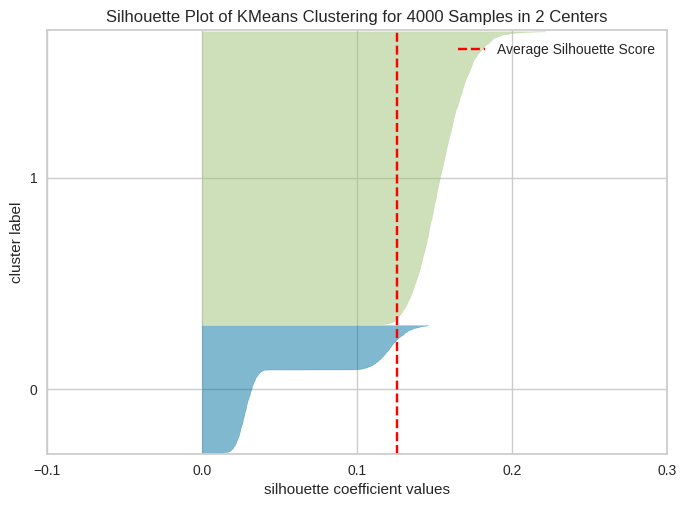

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [95]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

The graph of K-Means Clustering for 400 samples in 2 centers shows that the majority of silhouette scores are positive, suggesting that the samples are well-aligned with their respective clusters and are sufficiently distant from other clusters. This indicates that the clustering solution has successfully separated the data points into distinct and well-defined clusters.

However, it's important to note that while most of the silhouette scores being positive is a good sign, it doesn't necessarily mean the clustering is "perfect" or without flaws. There may still be some overlap or uncertainty between clusters, especially for samples, where silhouette scores are close to 0 or even negative. This indicates that while clustering is generally effective, there could still be areas of ambiguity or misclassification.

**Finally**, both models play a valuable role in predicting the likelihood of a person experiencing a heart attack, aiding in our understanding of the contributing factors, such as high blood pressure, cholesterol levels, and lifestyle choices. However, since our dataset includes a "Selector" class (class label) that indicates whether a person is at risk of a heart attack or not, this makes supervised learning models (classification) more accurate and suitable for application than unsupervised learning models (clustering), where the expected outputs are known in advance using this class classification feature.  


# 8. References:


[1] M1Relly, "Heart Attack Prediction," Kaggle. [Online]. Available: https://www.kaggle.com/datasets/m1relly/heart-attack-prediction/data. [Accessed: Nov.29, 2024].

[2] Fajer Alamro, "IT326-Project," GitHub. [Online]. Available: https://github.com/FajerAlamro/IT326-Project. [Accessed: Nov. 29, 2024].

[3] ”Labs and Lecture Slides”, College of Computer Science, Department of Information Technology, King Saud University. [Accessed: Nov. 29, 2024].


[4] World Health Organization(WHO), “Cardiovascular diseases”. [Online]. Available:
https://www.who.int/health-topics/cardiovascular-diseases. [Accessed: Nov. 29, 2024].
